# Project: Investigate a Dataset-NoShow Appointment 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

 <a id='intro'></a>
## Introduction

> Clinics and offices in general are now moving to sheduled appointments approach. This is to avoid crowds and comgestions hence giving their costumers a very convient experience. However, these business might lose time and money if their costumers are not showing up to their booked time-slots.

> Understanding these data and when a costumer is expected to not attend might help them increase their show up rate to appointments. this can only be done after a throrough data analysis which might help give them a better insight on which factors have a high impact on attendance possibility and how would they accomodate for these factors to book a mire suitable appointments.

> In this report, we'll go through a data set provided by a clinic. we'll first clean the data, explore general insights and analyse the cleaned data set based on patients characteristics.

In [8]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling

> First, We'll load the data, trim any outliers and try to understand this dataset.

### General Properties

In [9]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("KaggleV2-May-2016.csv")
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Insights for Data Sample
>This gives a sample of the data set in the file.
> We can observe some spelling mistakes in the colummn headlines i.e., 'Hipertension', 'Handcap' and 'No-Show'.
> These will need to be renamed later. 
> 
>Another thought may be explored is adding a column for the waiting time between the 'ScheduledDay' and 'AppointmentDay'. However, Seeing the info provided for both columns this will not be possible. ideally, we'll need the time stamp for both appointmentDay and ScheduledDay. Therefore, we'll ignore the time stamp for both columns.
>



In [10]:
# Rename incorrect column names
df.rename(columns= {'Hipertension' : 'Hypertension' , 
                    'Handcap' : 'Handicap' , 
                    'SMS_received' : 'SMSReceived' ,
                    'No-show' : 'NoShow' } , inplace=True)
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#Exploring All data type in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMSReceived     110527 non-null  int64  
 13  NoShow          110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Insights on dataset info
> No Nan values is obsereved here, However, Datatype might need changing for variuos columns. For example, 'PatientId' should be integers not floats. 'AppointmentDay' data type is date not integer. For more convenient analysis, this will be changed.
> '0' and '1' values are used as way to replace 'No' and 'Yes'. so these should be treated as object Dtype rather than integers.

In [12]:
#  Changing Dtype and deleting timestamps
df['PatientId'] = df['PatientId'].astype('int64')
#df['Scholarship'] = df['Scholarship'].astype('object')
#df['Hypertension'] = df['Hypertension'].astype('object')
#df['Diabetes'] = df['Diabetes'].astype('object')
#df['Alcoholism'] = df['Alcoholism'].astype('object')
#df['Handicap'] = df['Handicap'].astype('object')
#df['SMSReceived'] = df['SMSReceived'].astype('object')

df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')

In [13]:
# execute info again to check datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

In [14]:
# see statistical analysis
df.describe()


,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,1.105270e+05,1.105270e+05,110527,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,2016-05-08 20:33:18.179630080,2016-05-19 00:57:50.008233472,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
min,3.921700e+04,5.030230e+06,2015-11-10 00:00:00,2016-04-29 00:00:00,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,2016-04-29 00:00:00,2016-05-09 00:00:00,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,2016-05-10 00:00:00,2016-05-18 00:00:00,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,2016-05-20 00:00:00,2016-05-31 00:00:00,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,2016-06-08 00:00:00,2016-06-08 00:00:00,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000
std,2.560949e+14,7.129575e+04,NaN,NaN,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873


#### More Insights
> Checking the time span of the data: it is taken between 2015-11-10 and 2016-06-08 which is Equivalent to 7 months of data. however, AppontmentDay data had started from 2016-04-29.
>
> Here it seems unusual to have an age as a minus (-1), this propably refers to unborn babies wihch is quite rare.
> Let's invistigate this data point specifically.


In [15]:
df.query("Age == -1")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
99832,465943158731293,5775010,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


There's only data point for this age. Let's perform a comparsion and find the number of babies aged zero below.

In [16]:
df[df.Age == 0].shape[0]

3539

a big difference bewteen the new born babies aged 0 and the supposed unborn baby. Our conclusion here is -1 is a typo and we will delete this row.

In [17]:
# Drop age == -1
df.drop(df[df['Age'] == -1 ].index, inplace = True)

In [18]:
# see data for ScheduledDay between 2015-11-10 and 2016-04-29
df[( df.ScheduledDay >= '2015-11-10') & (df.ScheduledDay <= '2016-4-29' ) ]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110518,72633149253362,5630375,F,2016-04-27,2016-06-07,50,MARIA ORTIZ,0,0,0,0,0,1,No
110519,65423877893936,5630447,F,2016-04-27,2016-06-07,22,MARIA ORTIZ,0,0,0,0,0,1,No
110524,15576631729893,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,92134931435557,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [19]:
# Check for duplicates
df.duplicated().sum()

0

In [20]:
df[df.duplicated('AppointmentID')]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow


As seen above, the data set has no duplicates. So no further action is required here.

>Now the data is cleaned, some columns might not be needed for this analysis. For example, patientId and AppointmentID are systematic numbers and will not be needed for this data analysis.Thus, we will drop these columns

In [21]:
# Deleting 'PatientId' and 'AppointmentID' columns
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [22]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Thoughts on upcoming analysis
> In order ,for us, to explore the factors that have an impact on whether patients would be showing up for their appointments, additional variables we could explore are:
> what week of the day is the appointment? and what is the waiting time between the scheduled day and appointment day. So, Let's add these columns to our dataset.

In [23]:
# Add waiting time column 
df['WaitingTime'] = df['AppointmentDay'] - df['ScheduledDay']
df['WaitingTime'] = df['WaitingTime'].dt.days
# prints appointments where waiting time is more than 0 days
df[(df.WaitingTime > 0)]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,WaitingTime
5,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,2
6,F,2016-04-27,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,2
7,F,2016-04-27,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,2
9,F,2016-04-27,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,2
10,F,2016-04-27,2016-04-29,30,NOVA PALESTINA,0,0,0,0,0,0,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,No,41


In [24]:
df['WaitingTime'].describe()

count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingTime, dtype: float64

It looks like we have negative waiting times. this happens when the appointment day is set before the Scheduled day. let's look into these numbers more:

In [25]:
df.query('WaitingTime < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,WaitingTime
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-1
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-1
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-1
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-6
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-1


This looks unrealistic. all 5 appointments that have negative waiting times did not show up for their appointments. we'll treat those data as outliers or systematic error. so we'll drop them.

In [26]:
df.drop(df[df['WaitingTime'] <= -1 ].index, inplace = True)

In [27]:
# Add day of week for appointment column
df['day_of_week'] = df['AppointmentDay'].dt.day_name()
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,WaitingTime,day_of_week
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


<a id='eda'></a>
## Exploratory Data Analysis

> The dataset is ready to be analysed. this analysis will be based on questions that might help us determine the reasons why patients aren't showing up, what characteristics those who did not show up have and does the waiting time have an impact or even do patients have a higher chance to show up on specific days of week.

> But before diving into specfice questions, let's have a general look on our dataset first.

In [28]:
# Show vs NoShow
df['NoShow'].value_counts()

NoShow
No     88207
Yes    22314
Name: count, dtype: int64

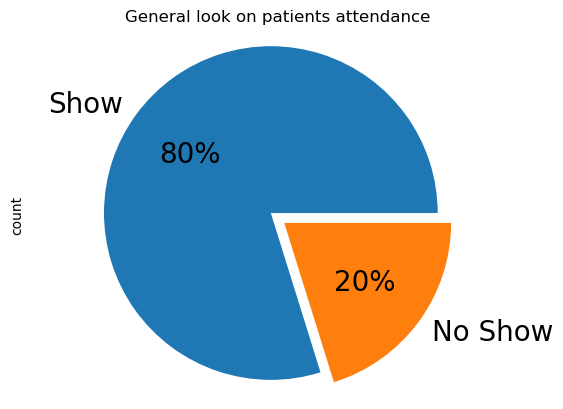

In [95]:
# Pie chart to illustrate the show and NoShow percentage
df['NoShow'].value_counts().plot(kind='pie',autopct='%.0f%%',labels=['Show','No Show'],explode= [0,0.1],fontsize=20)
plt.axis('equal')
plt.title('General look on patients attendance')
plt.show()

This shows that the number of patients that showed up is 4 times the number of patients that didn't during this period.

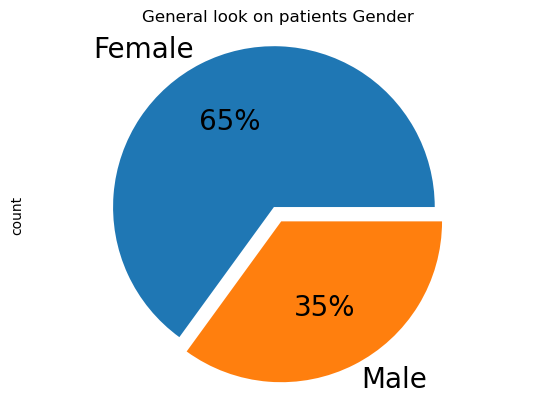

In [96]:
# Pie chart to illustrate Gender percentage
df['Gender'].value_counts().plot(kind='pie',autopct='%.0f%%',labels=['Female','Male'],explode= [0,0.1],fontsize=20)
plt.axis('equal')
plt.title('General look on patients Gender')
plt.show()

In [31]:
# statistics about patients Age
df['Age'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

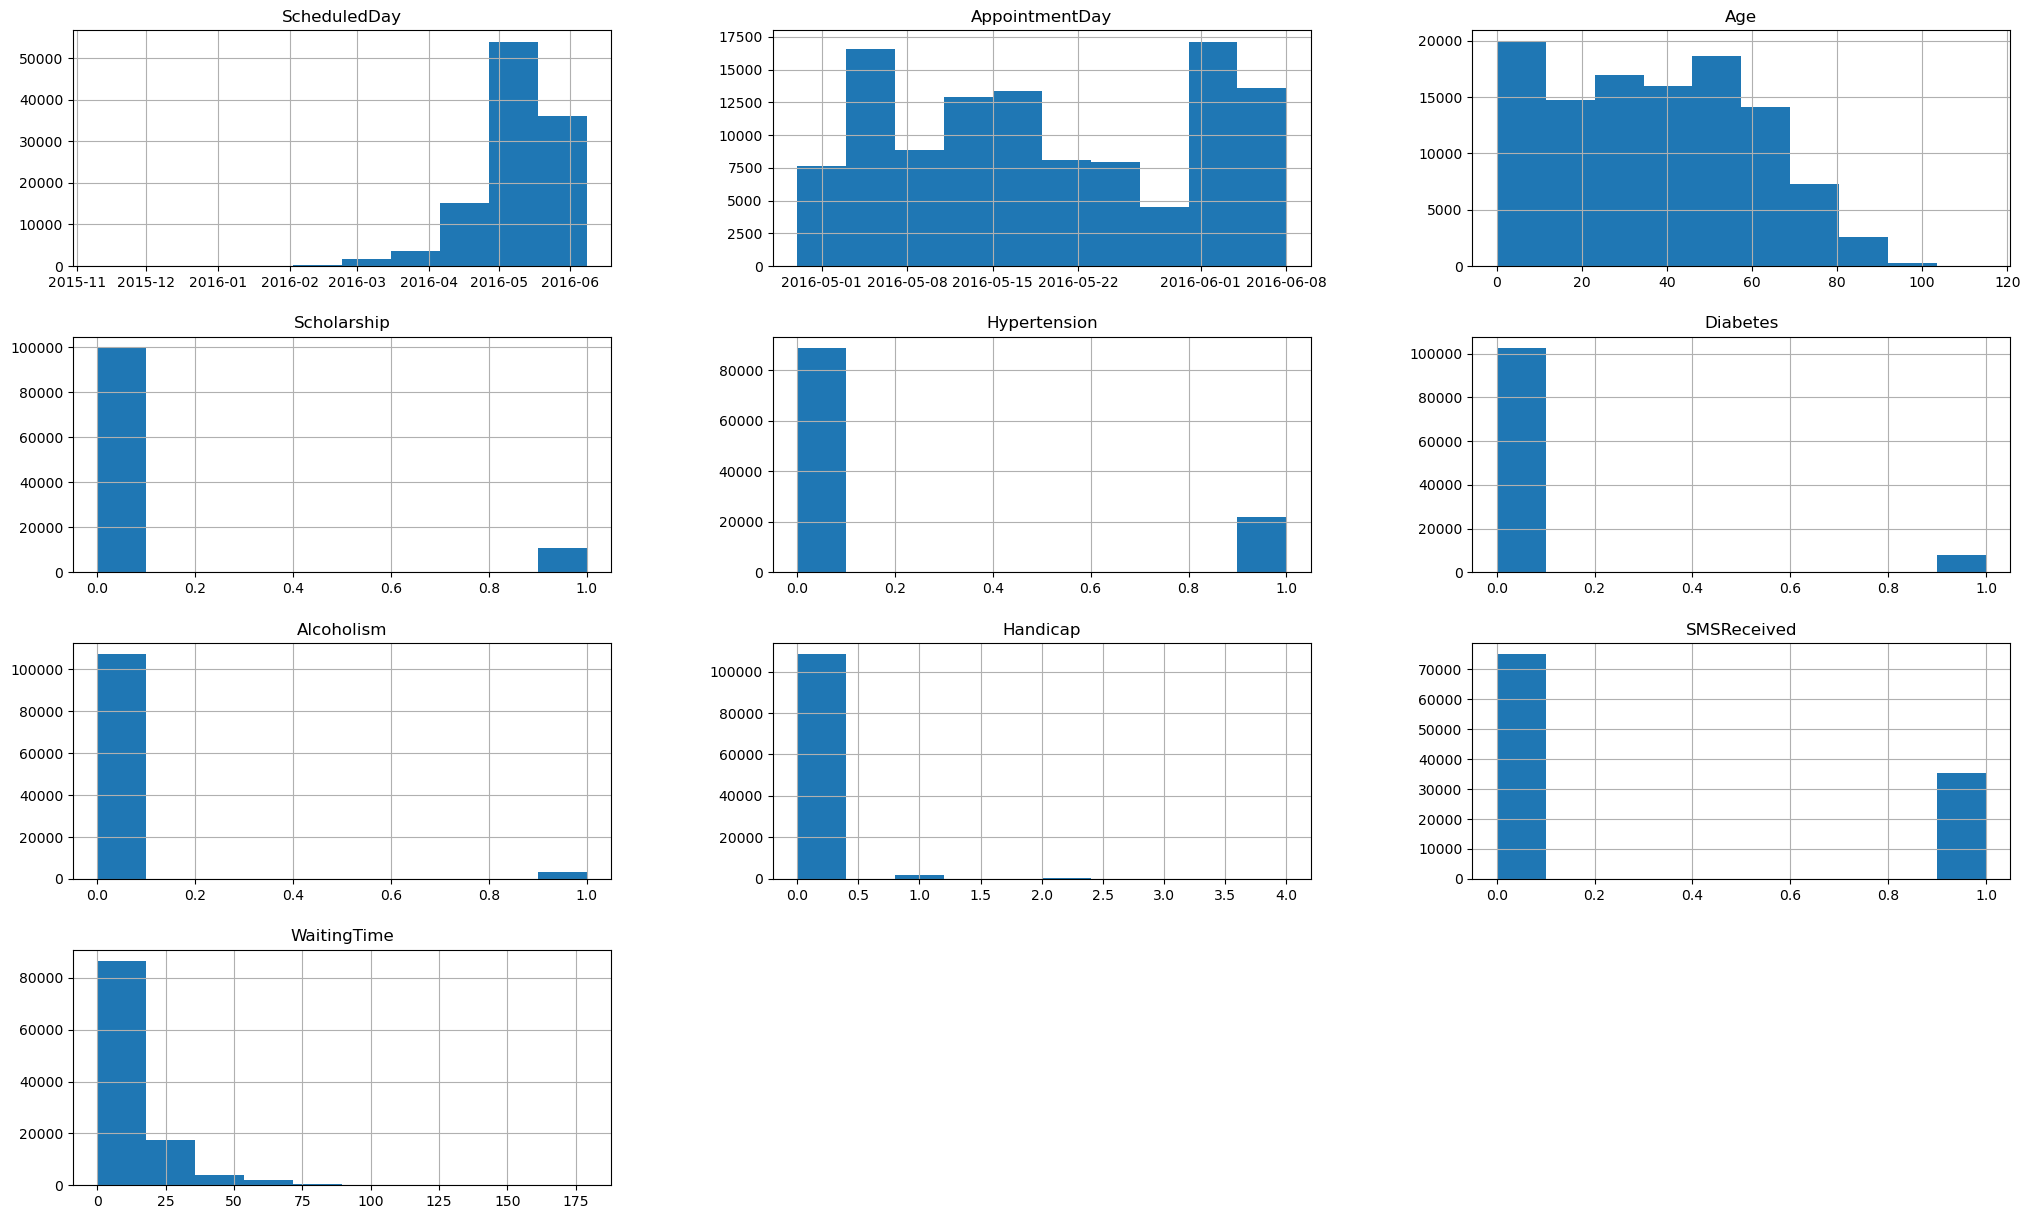

In [32]:
# Explore data
df.hist(figsize = (25 ,15));

This did not show all the columns histogram as the Dtype for the other columns( variables) is object rather than numbers. Let's do this in a different way.

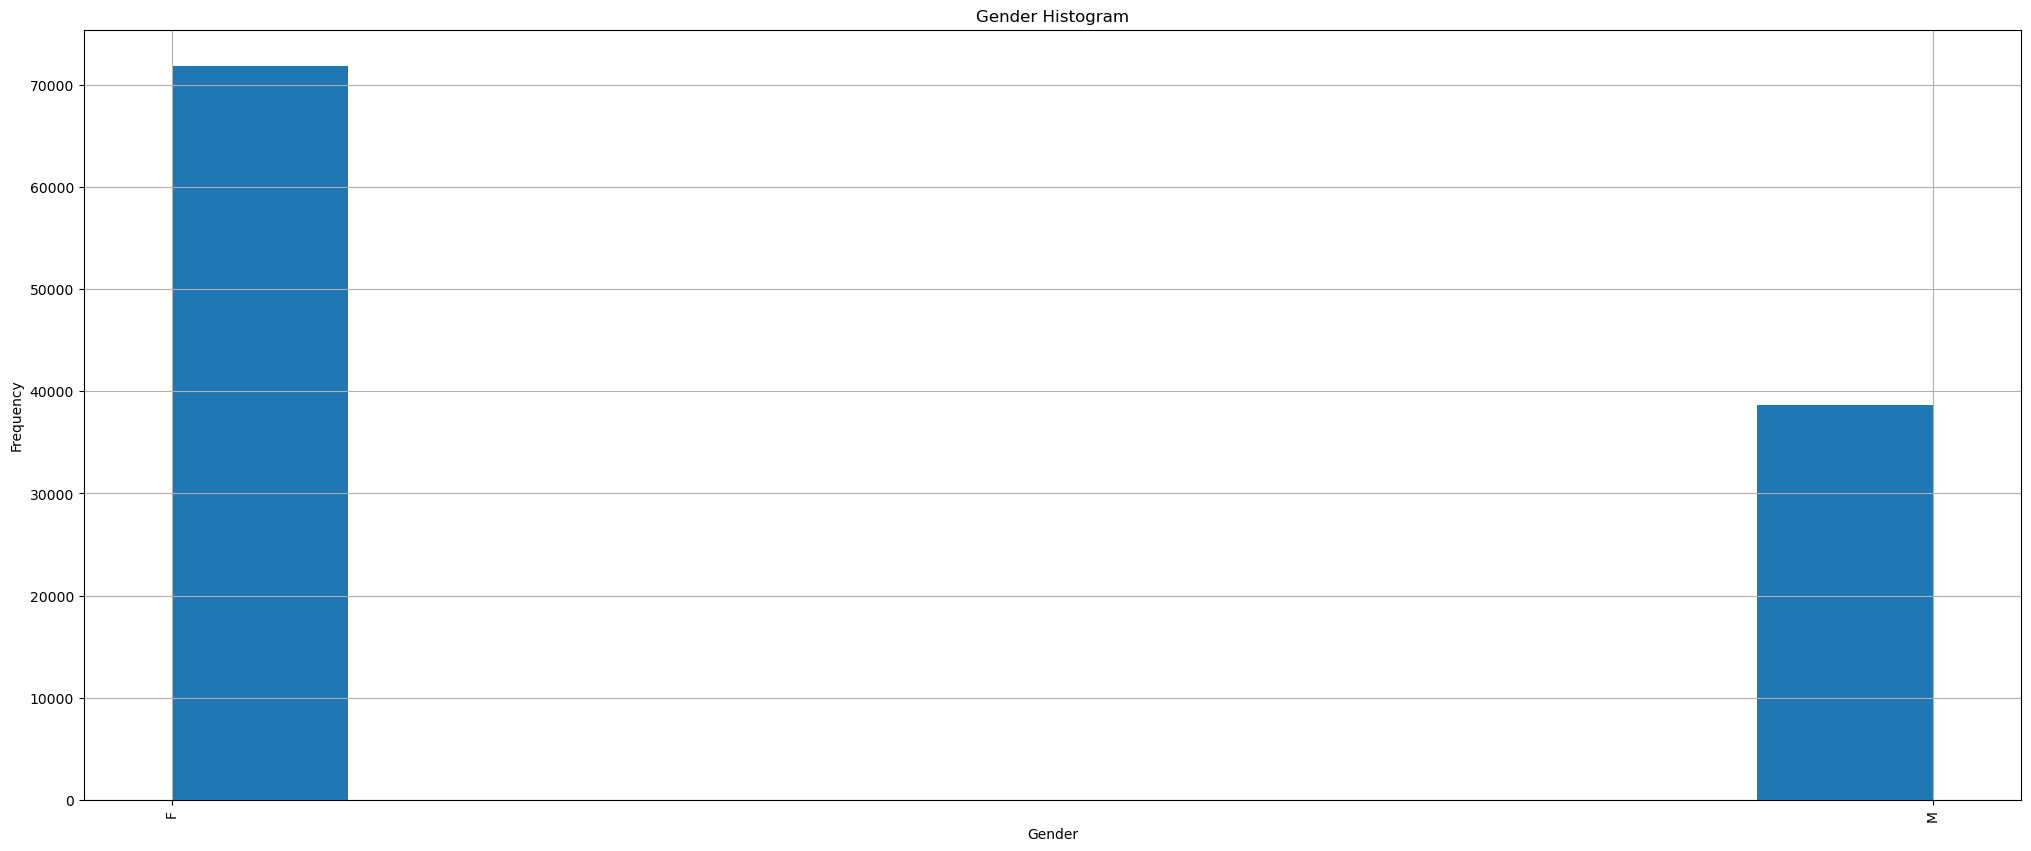

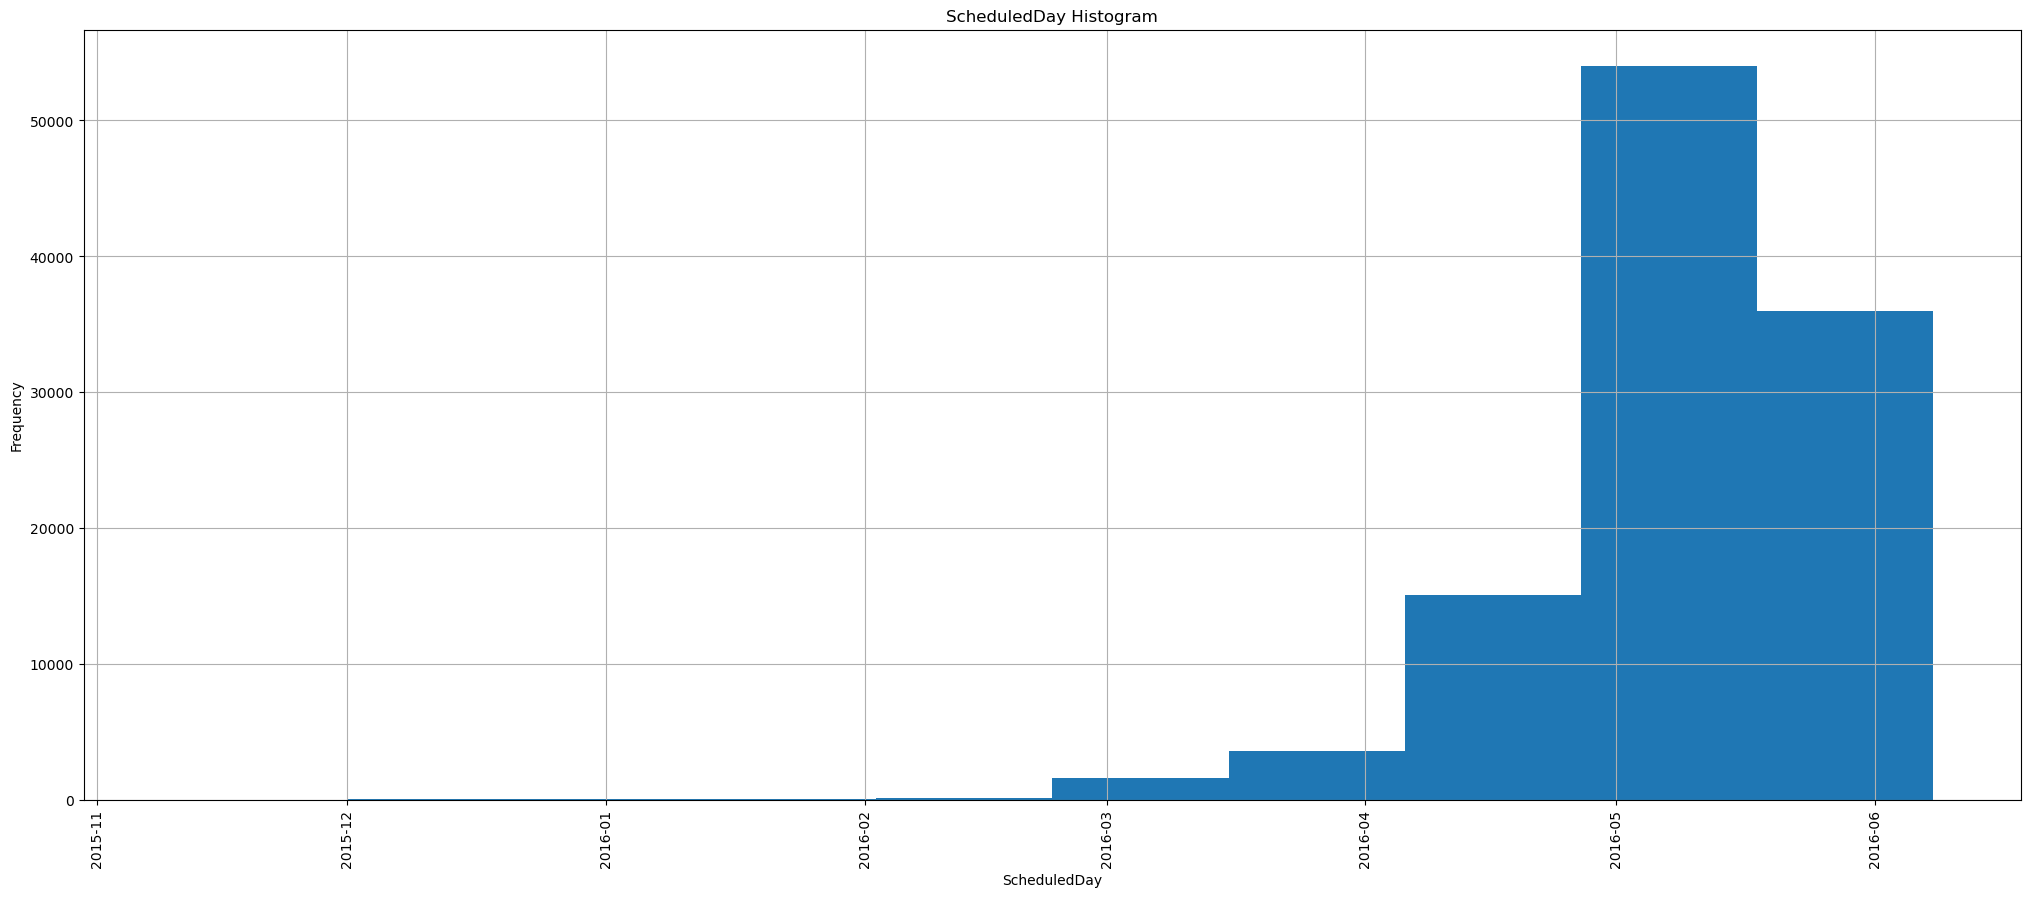

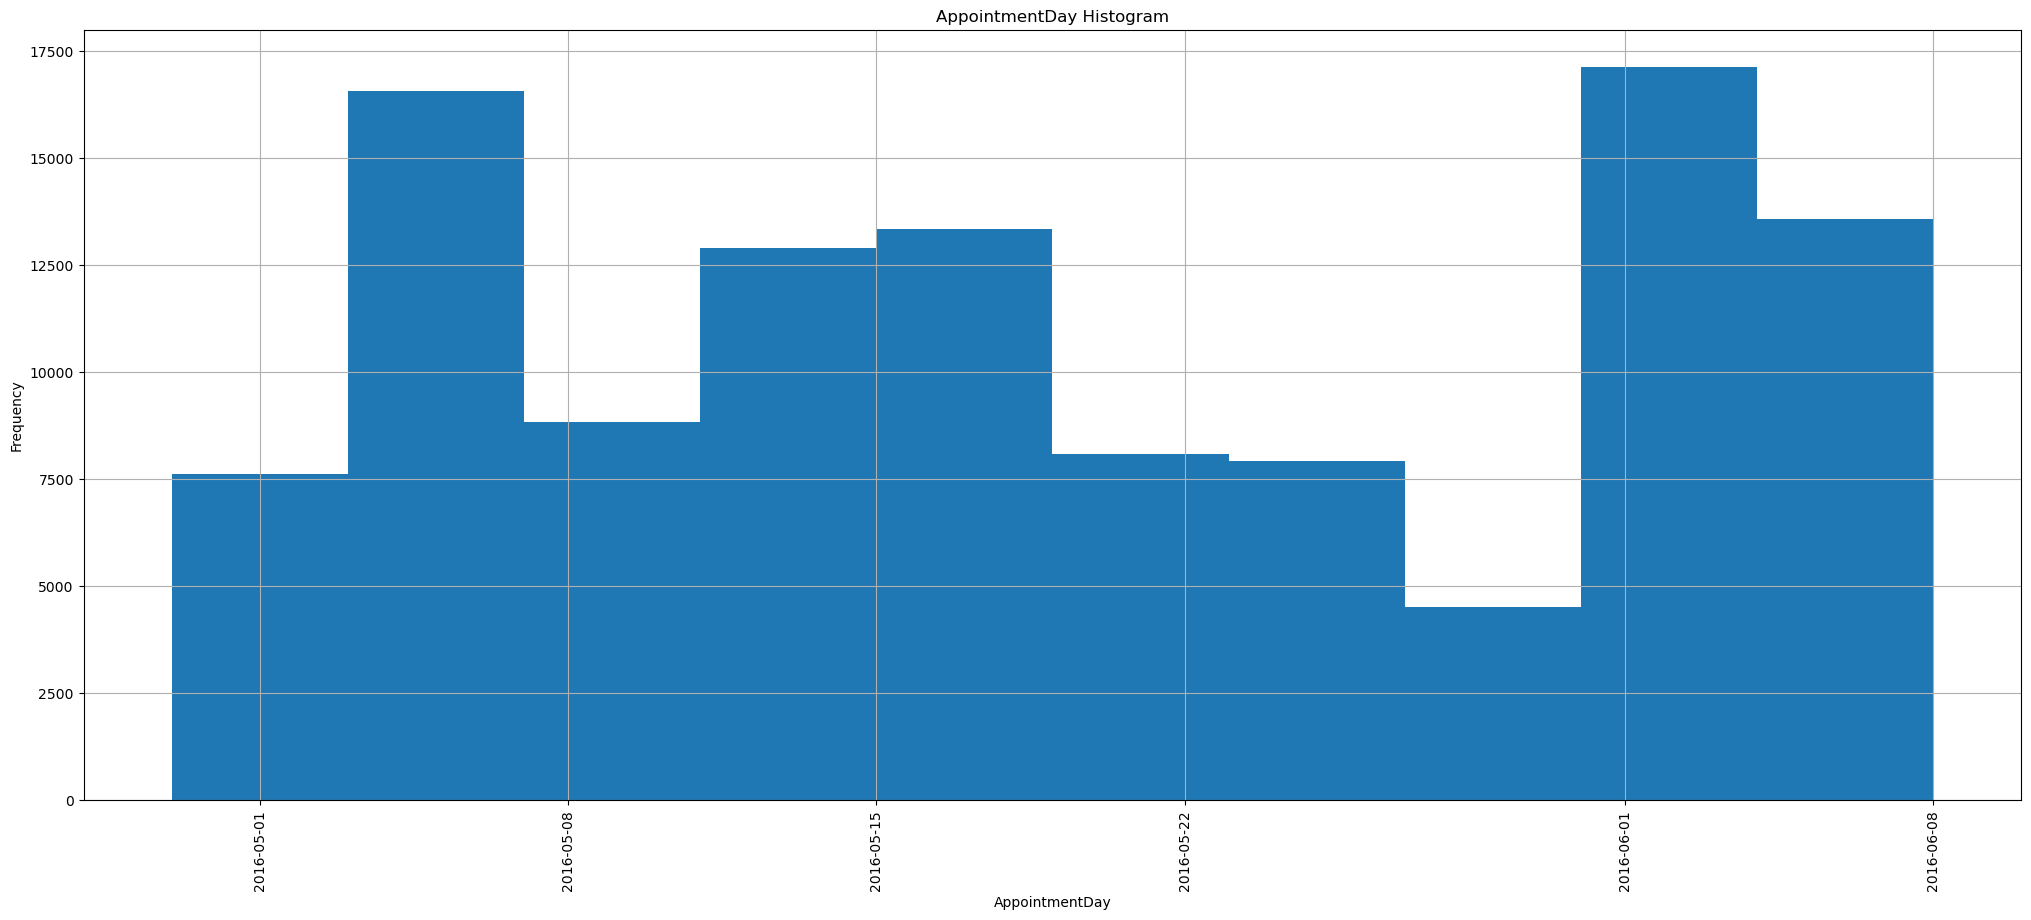

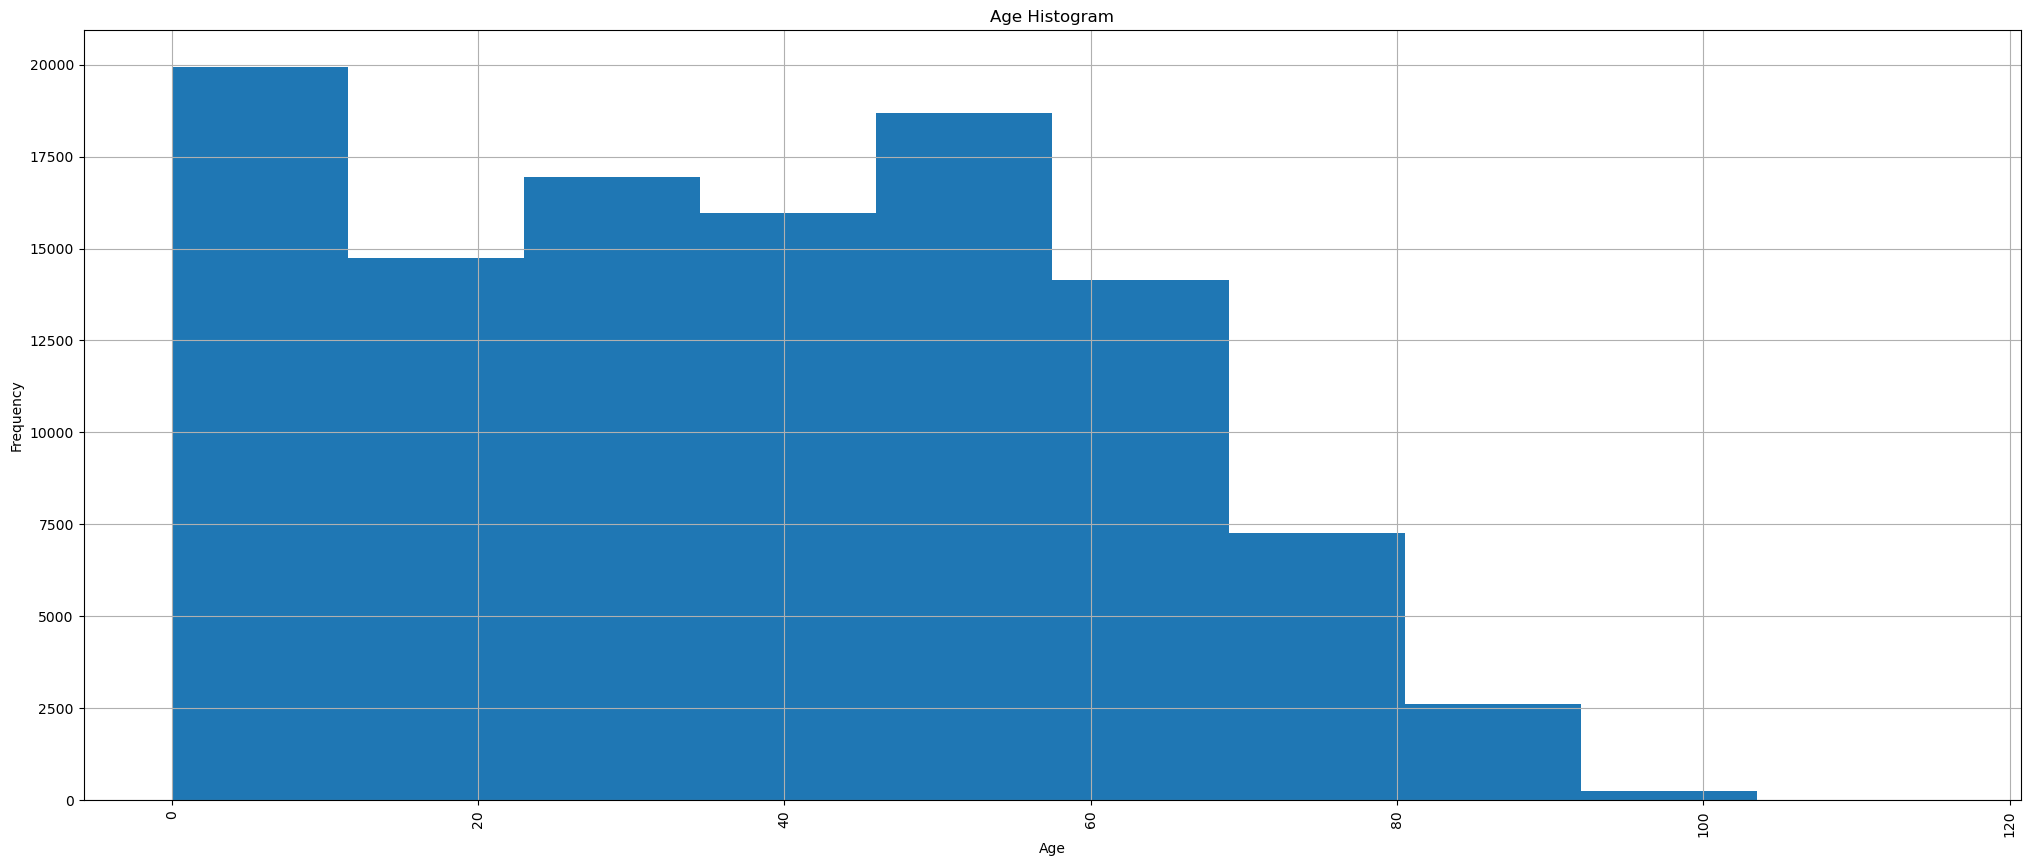

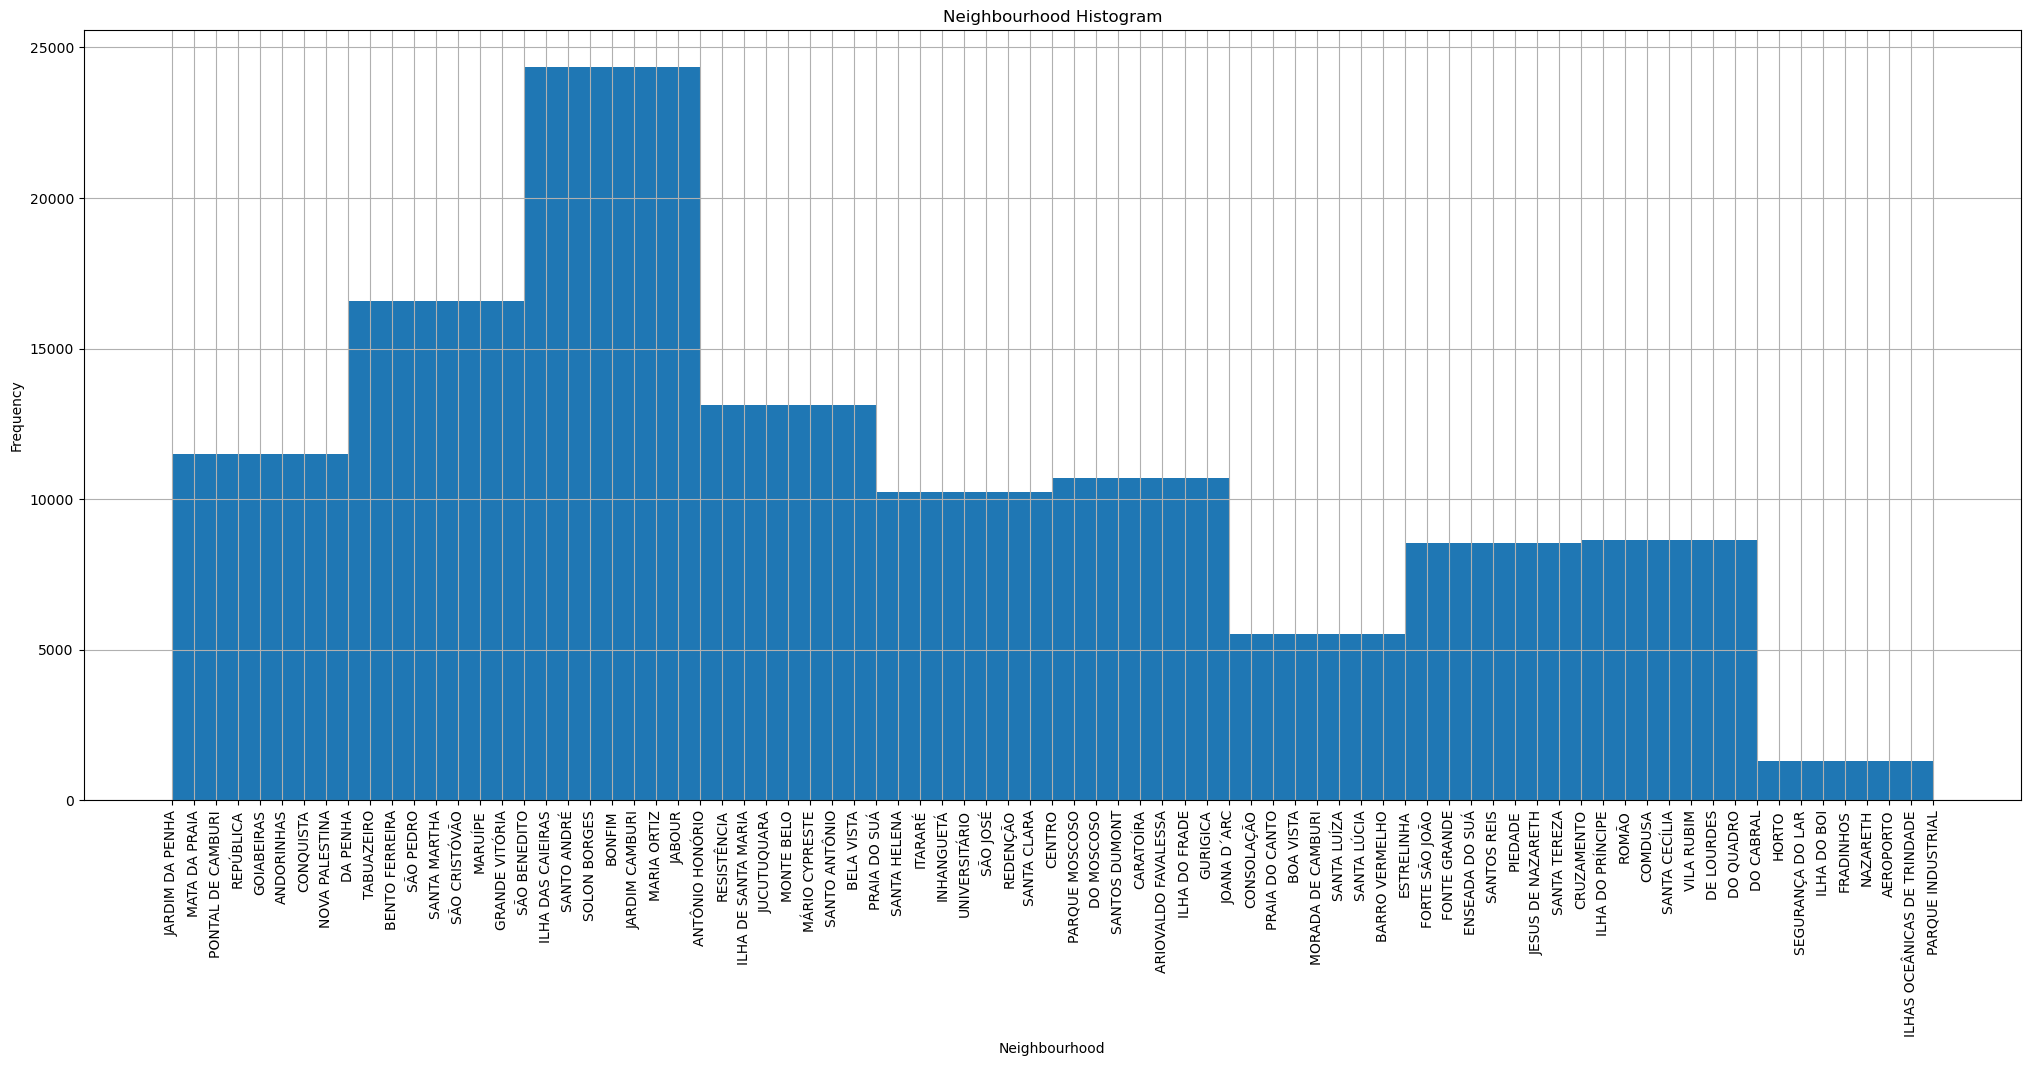

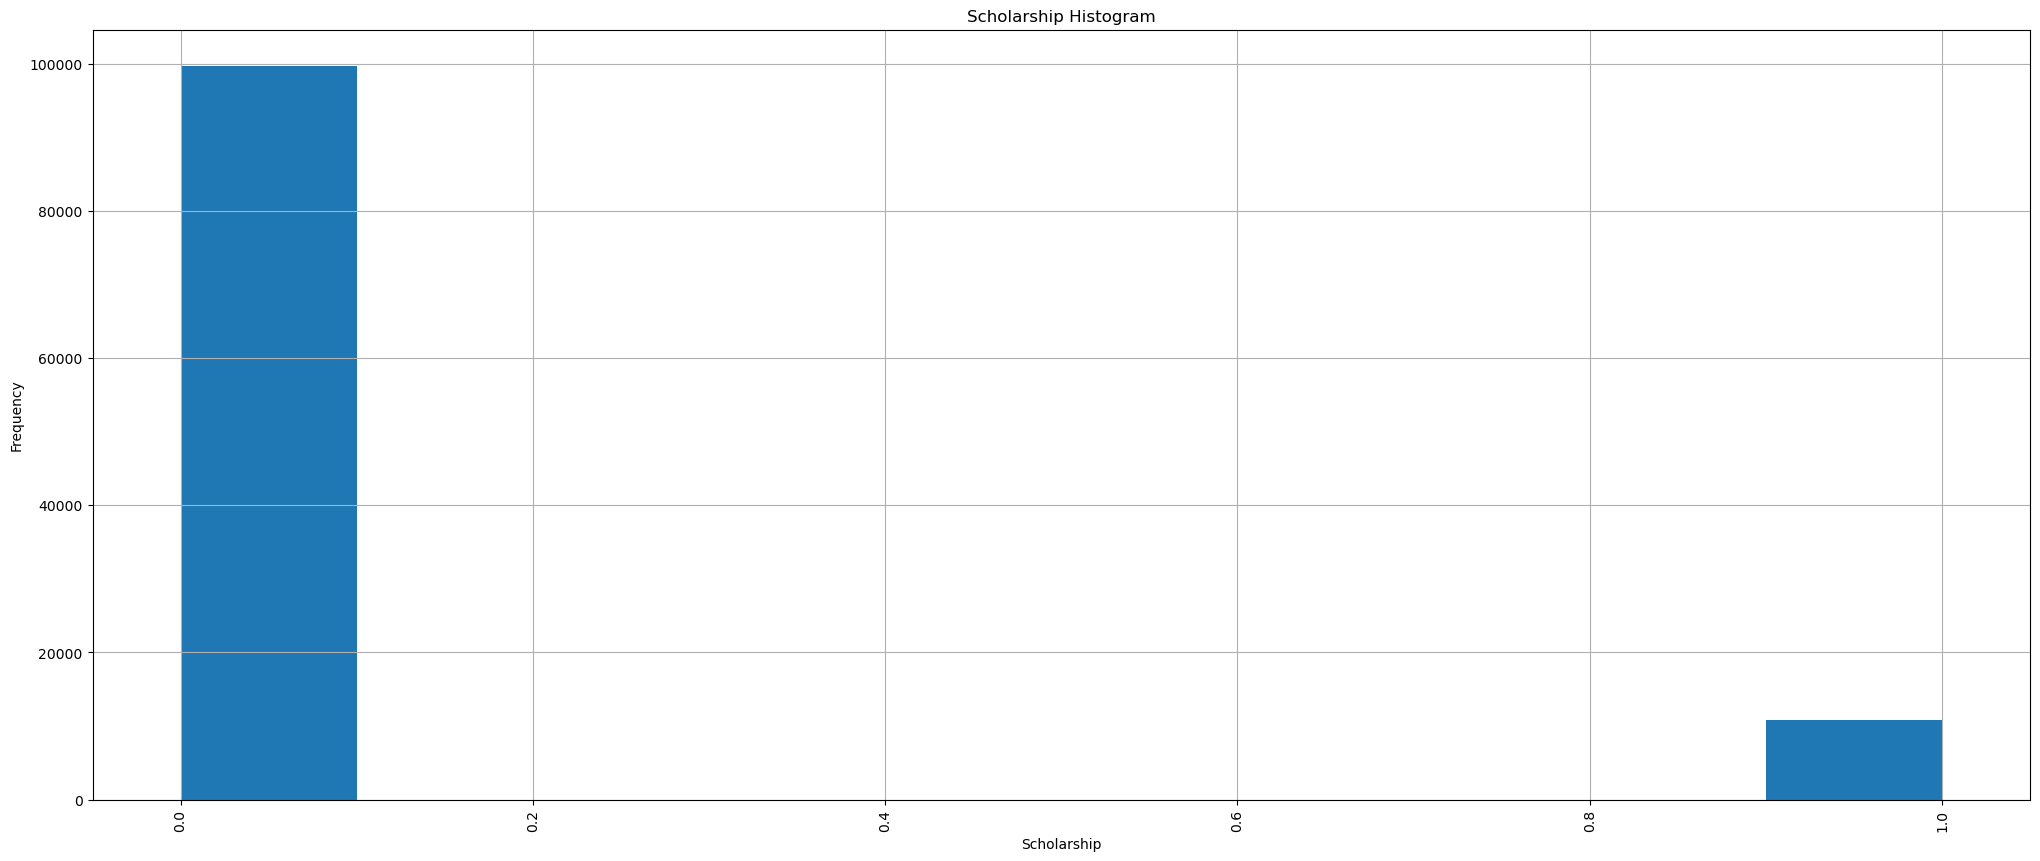

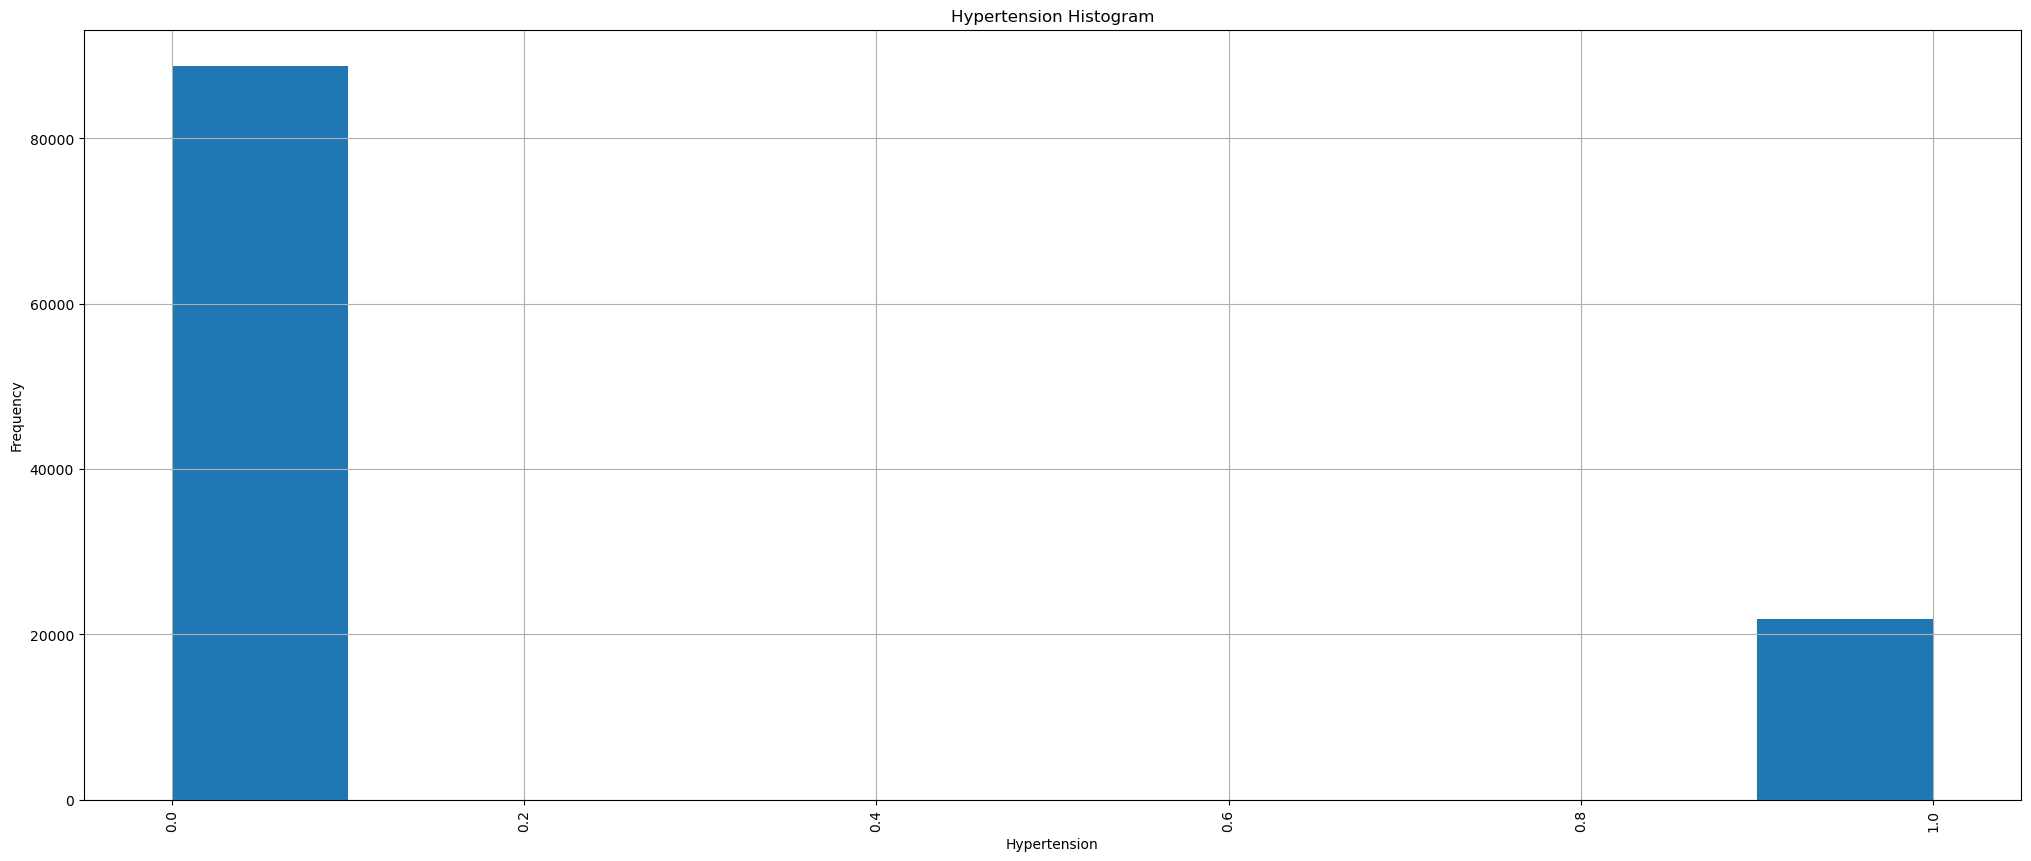

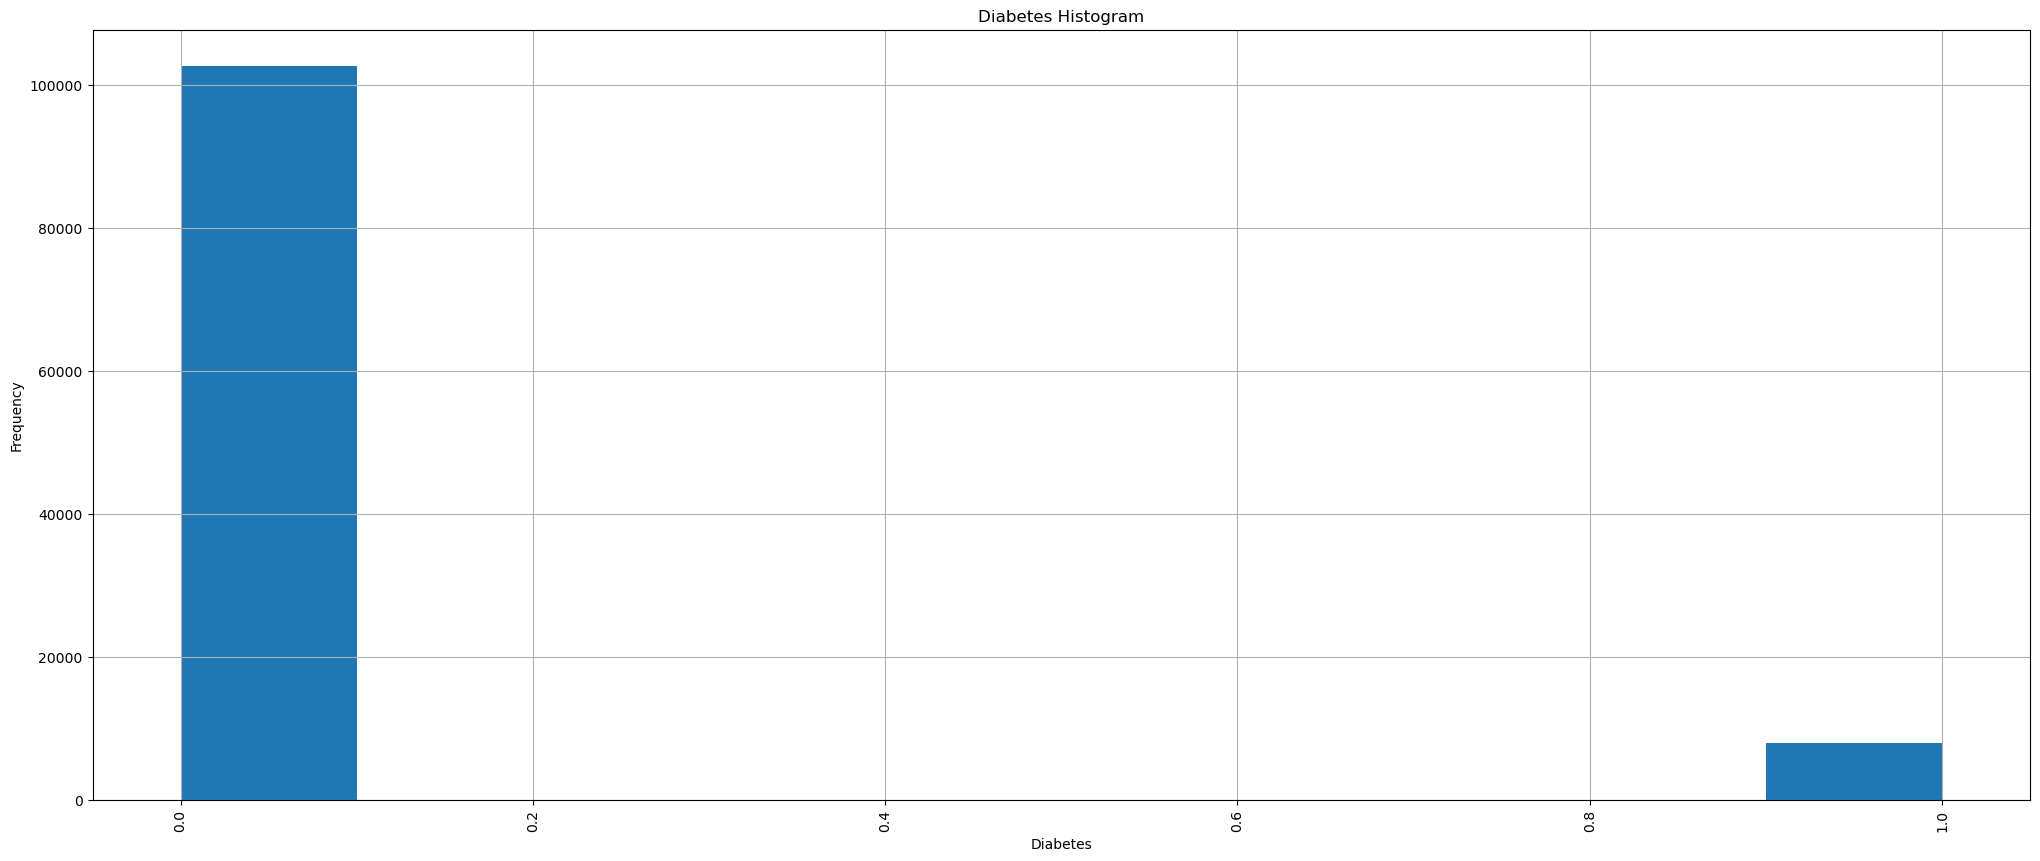

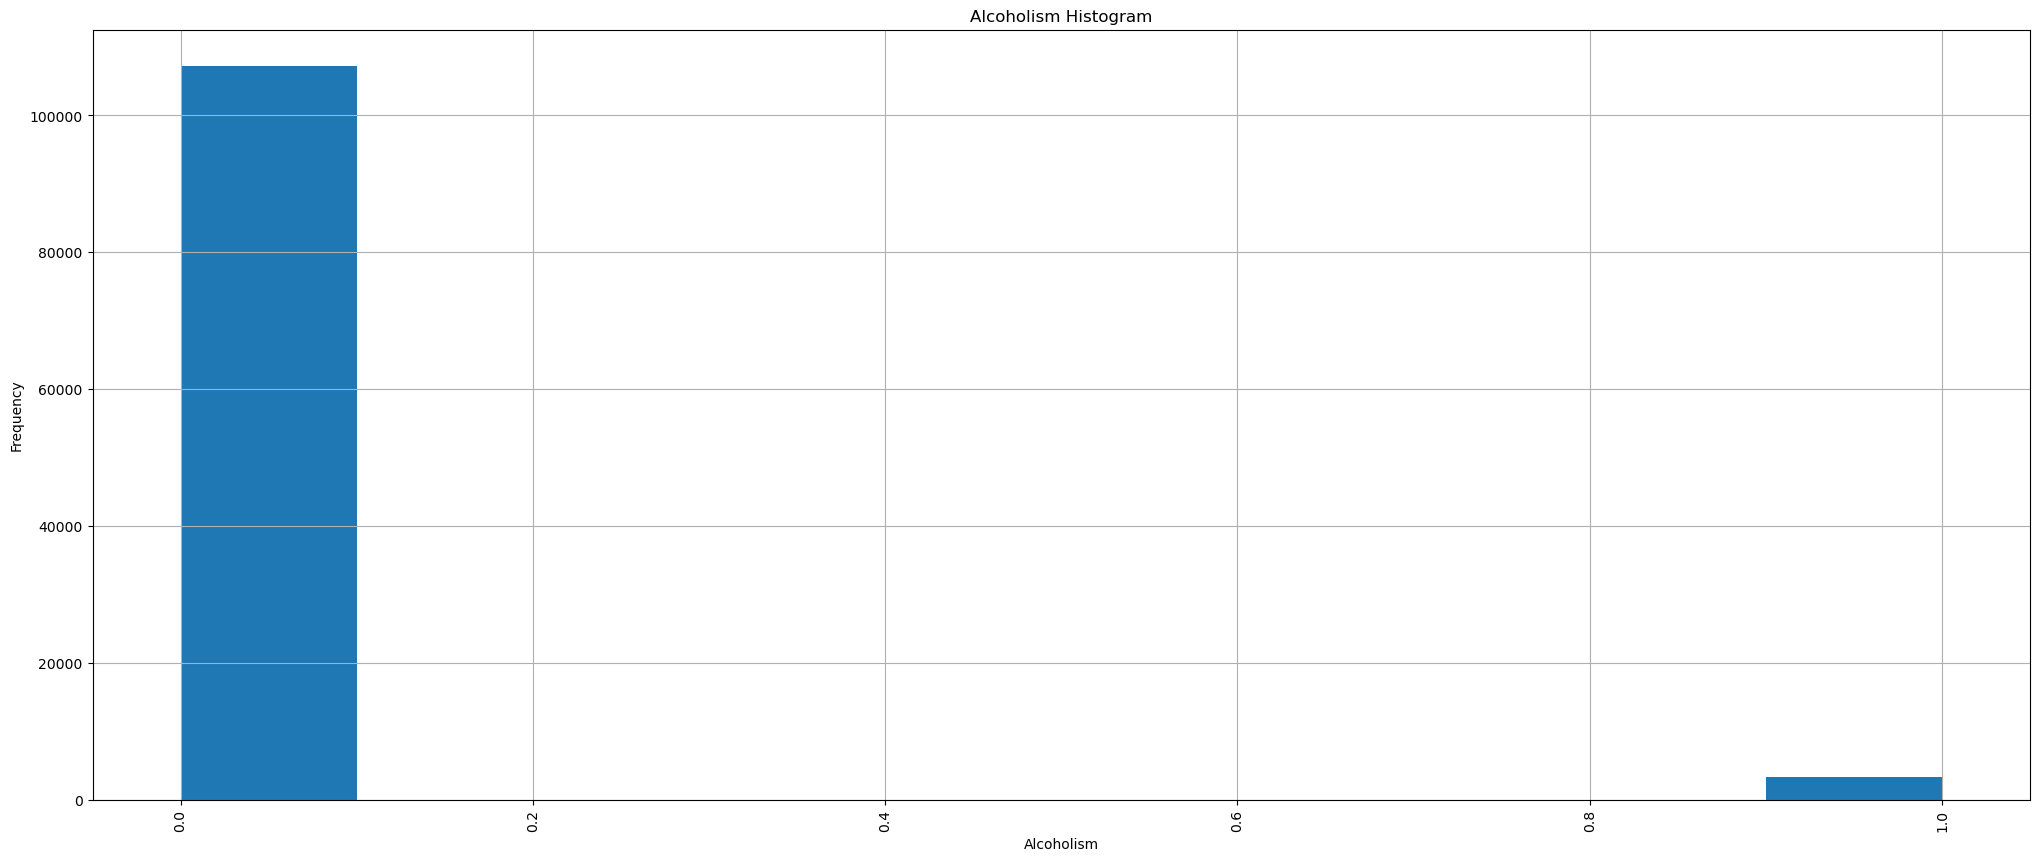

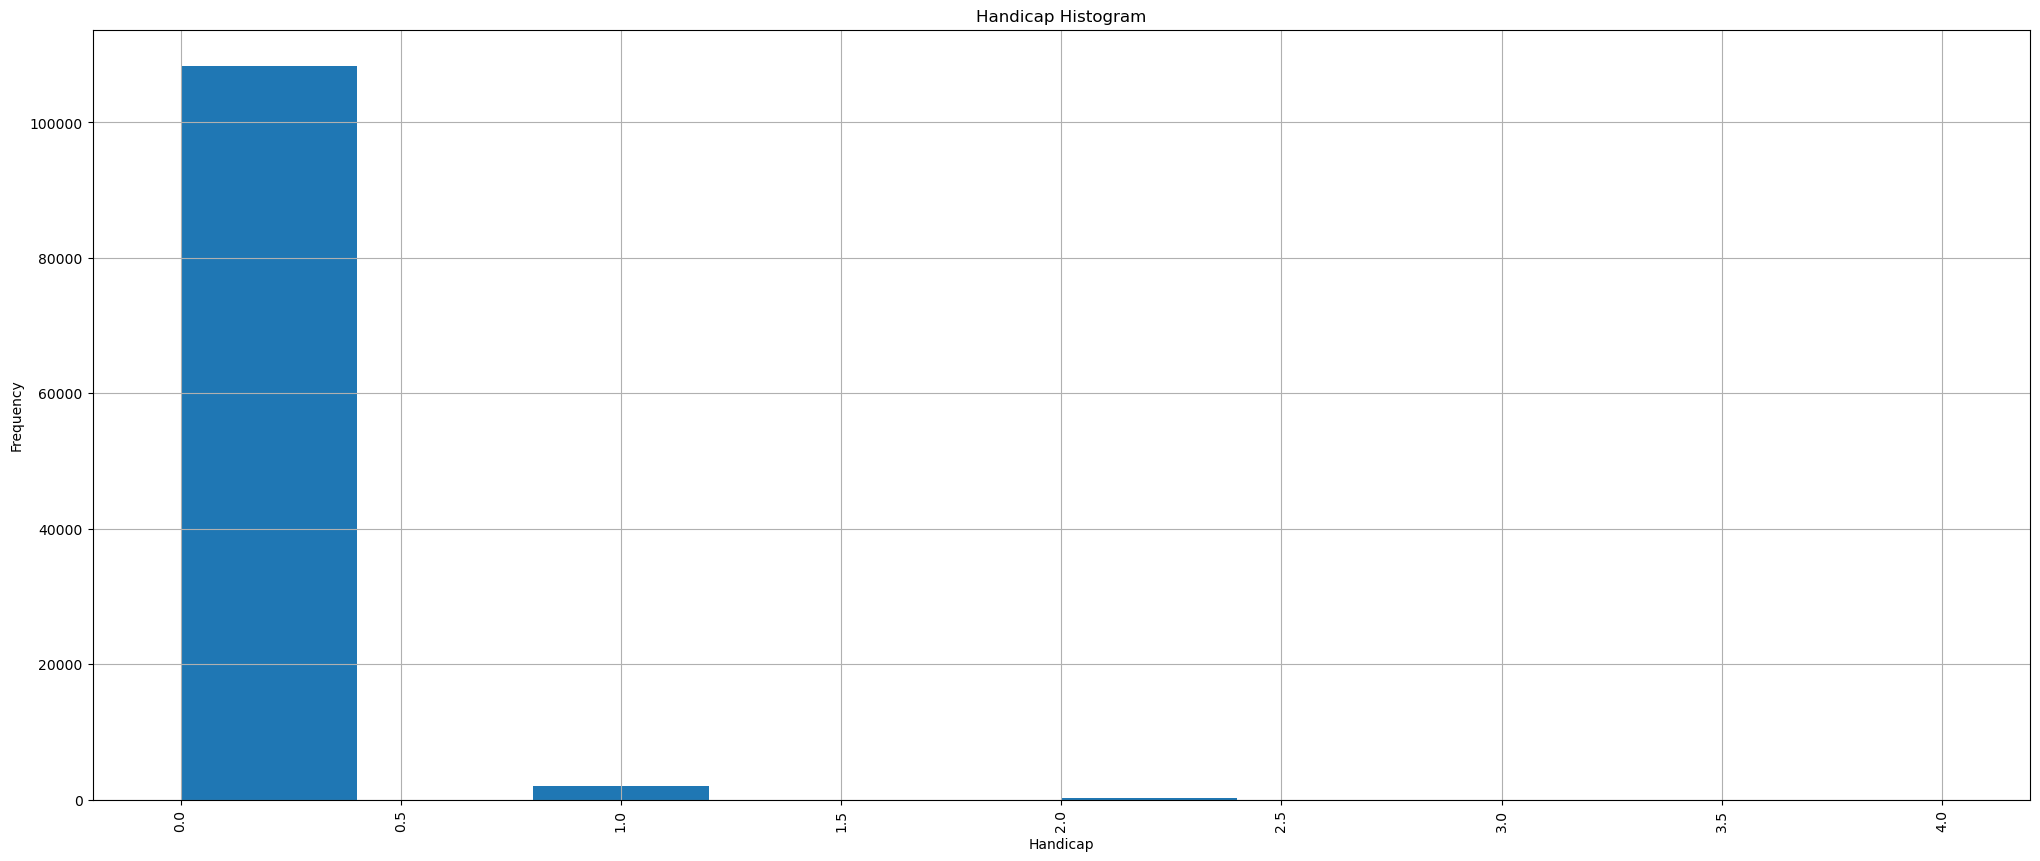

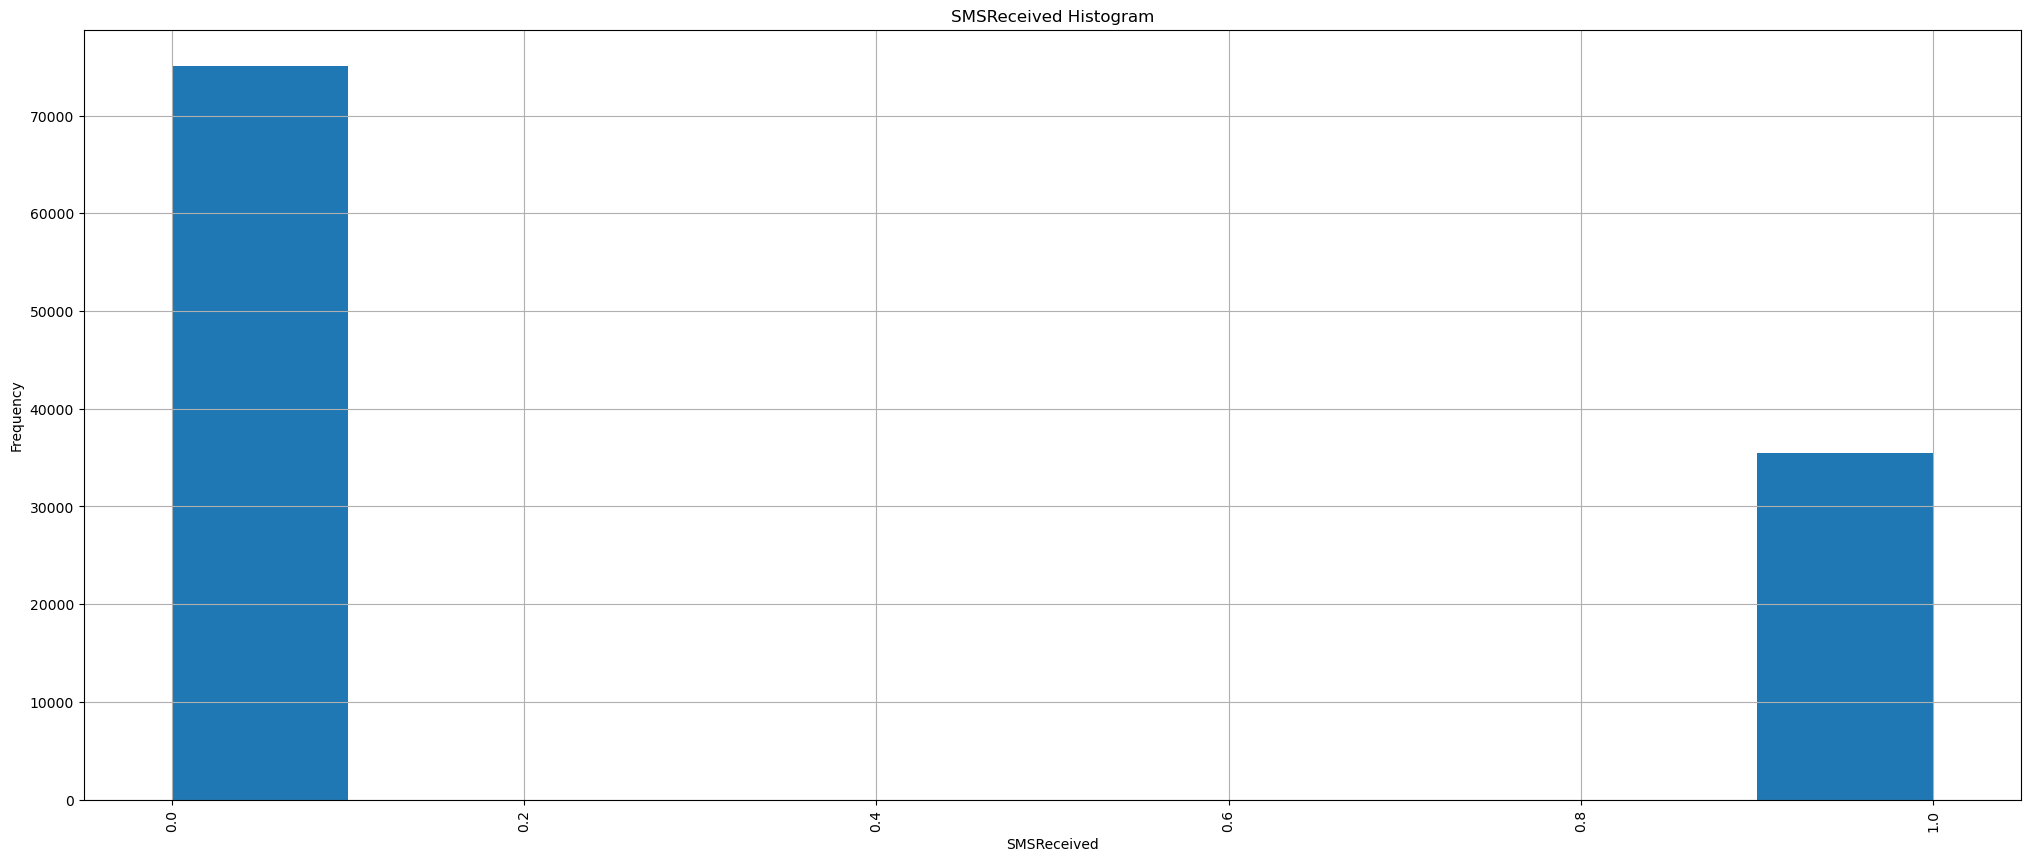

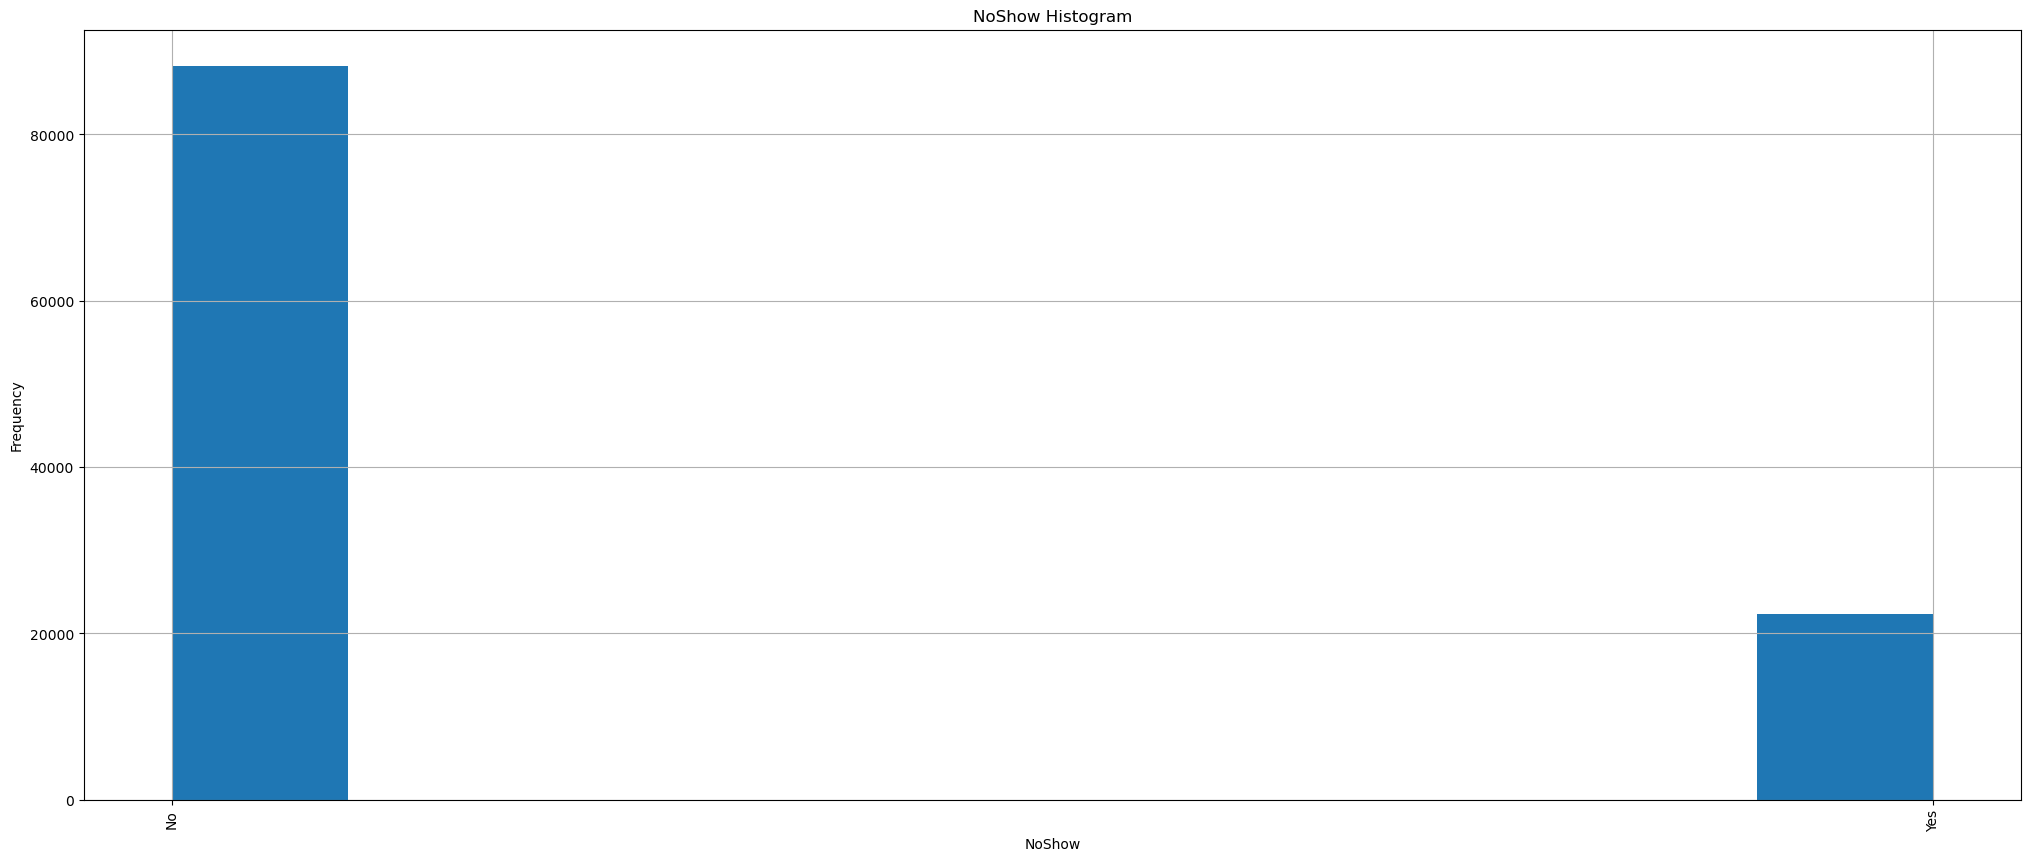

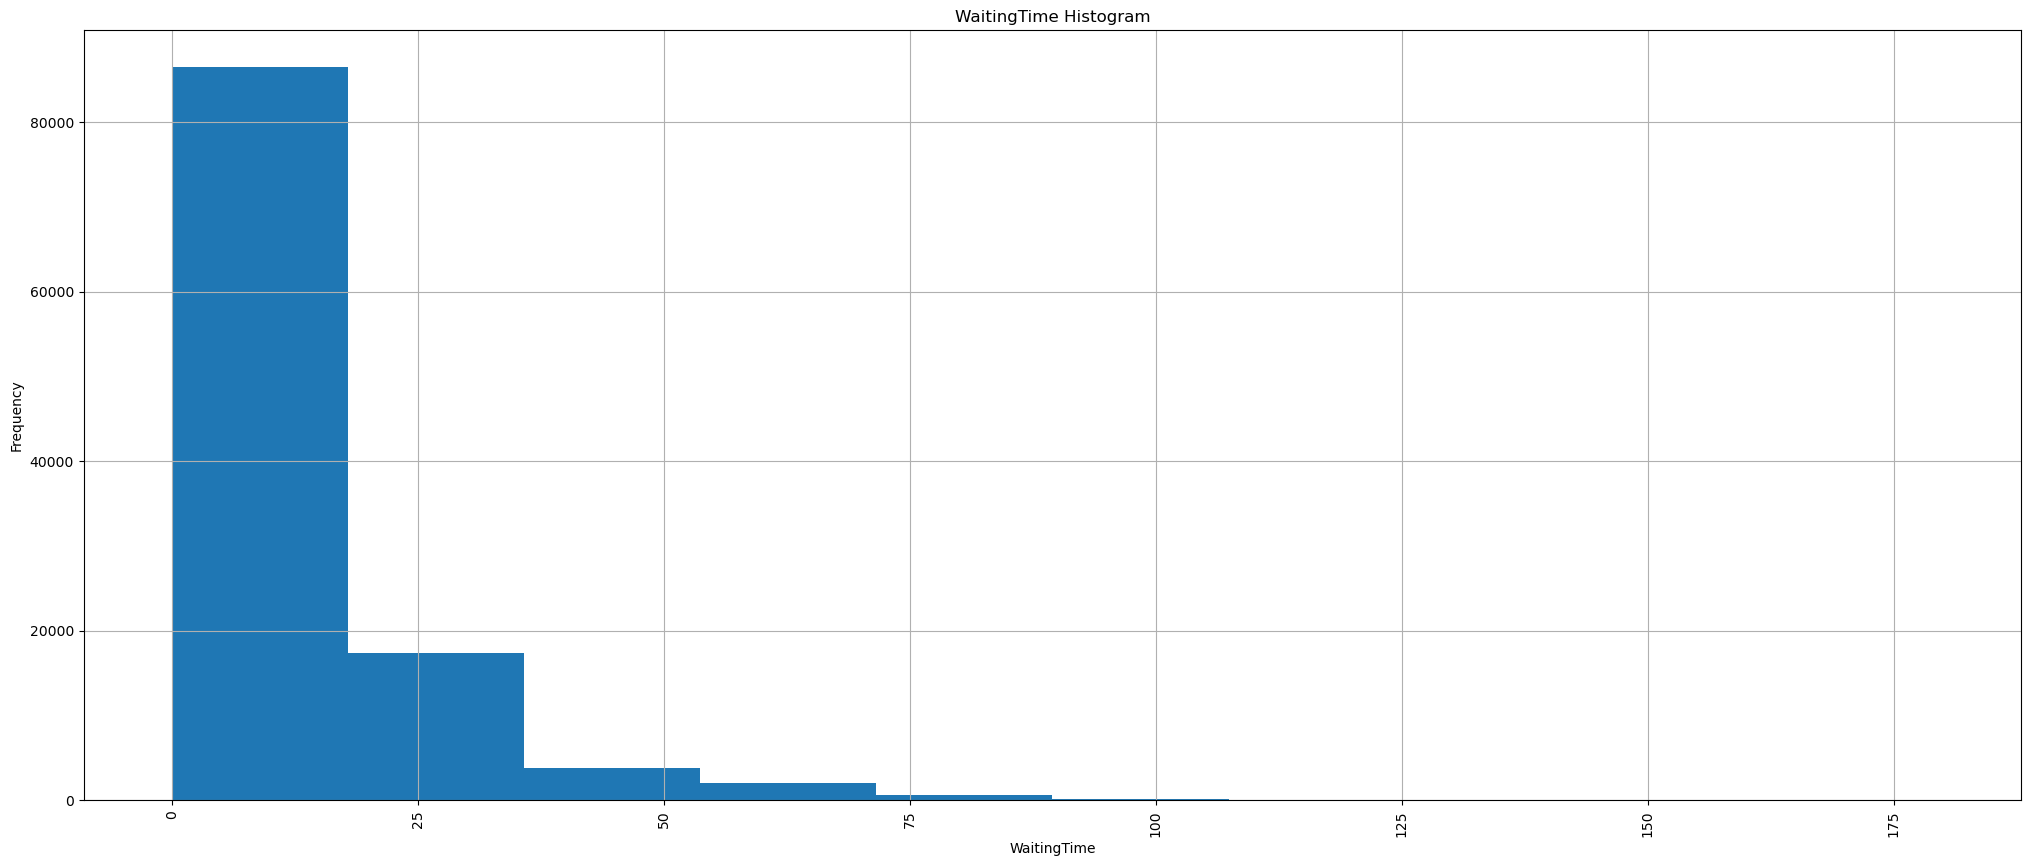

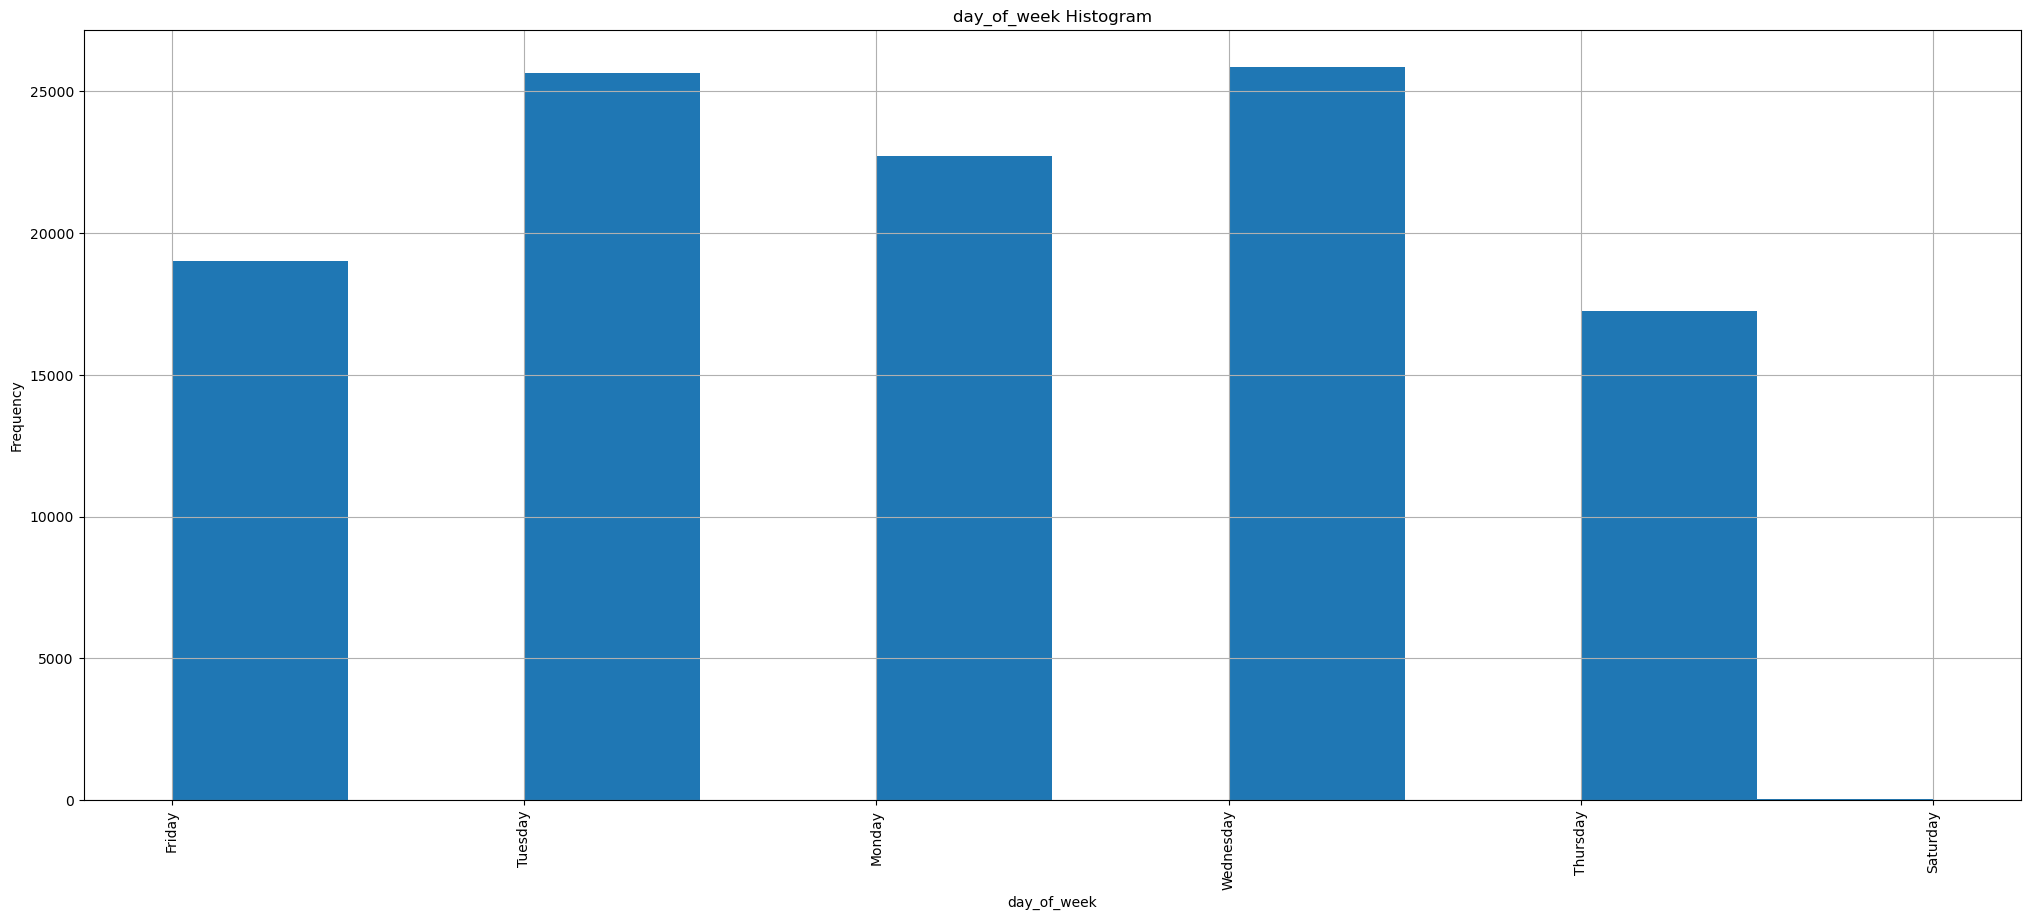

In [33]:

for column in df.columns:
    df[column].hist(figsize=(25,10))
    plt.title(column + " Histogram")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation = 90)
    plt.show()

#### General insights based on above Histograms
> The hospital received more female patient than males during this period. One question here, which gender has more NoShow rate?   
> The ScheduledDays had peaked between May and June in 2016.  
> Patients' Age has a mean of 37 years, which is the same as the median.   
> Most patients do not have Scholarships.  
> Most patients do not have Hypertension.  
> Most patients do not have Diabetes.  
> Most patients are not alcoholic.  
> Most patients are not handicapped.  
> People who did not recieve SMS is about twice those who recieved one.  
> Most patients has a waiting time less than 12 days.   
> Appointments were higher on Wednesday and Tuesday compared to other week days. However, No appointments were booked on Sunday or Saturday.  

## Research Queastion: What factors have an impact on predicting showing-up propability?

In [34]:
# Define  and filtering Show and No-show
Show = df['NoShow'] == 'No'
NoShow = df['NoShow'] == 'Yes'

In [35]:
# Find the mean age of patients who showed up
df[Show]['Age'].mean().round(1)

37.8

In [36]:
# Find the mean age of patients who didnot show up
df[NoShow]['Age'].mean().round(1)

34.3

Even though patients who did not show for their appointments have a lower age mean, There's no signigicant difference between them. To invistigate more, we'll factor in additional variables. But first lets plot a histogram of this age distribution.

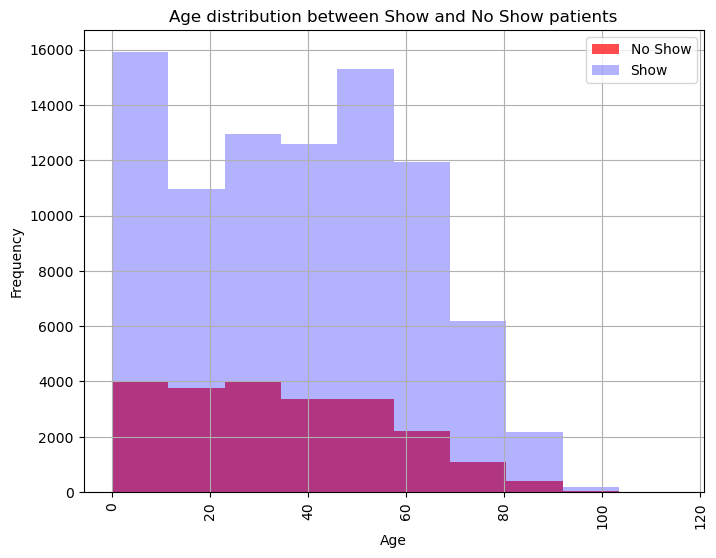

In [37]:
# Plot histogram between show vs noshow based on their ages
plt.figure(figsize = (8,6))
# patients who showed up are labeled by Yes and those who didn't by No
plt.hist(df[NoShow]['Age'], color = 'red', alpha = 0.7, label = 'No Show')
plt.hist(df[Show]['Age'],  color = 'blue' , alpha = 0.3,label = 'Show')
plt.title('Age distribution between Show and No Show patients')
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.legend()
plt.grid(True)
plt.show()


As shown above, patients who did not show up are normally aged between 0 and high fifties. A relatively higher frequency can be seen between 20 and 30 years old. the dataset also provides different medical conditions for these patients. let's factor in Hypertension and Diabetes to see how this impact the show up probability.

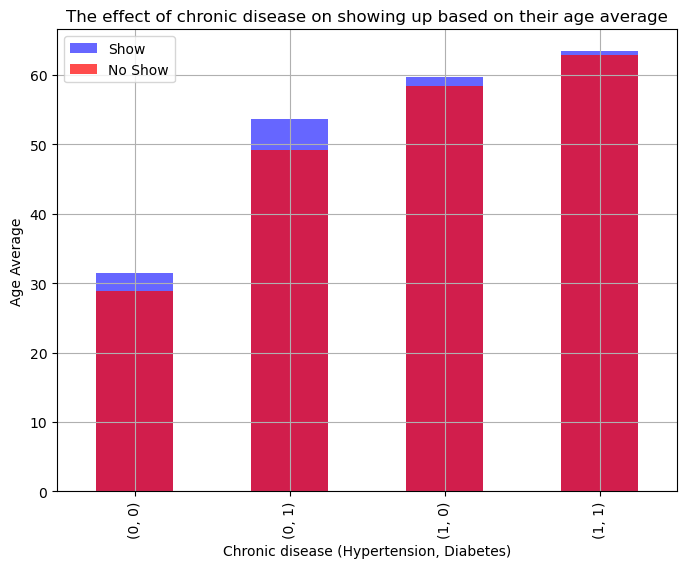

In [38]:
# Filter dataset for those who did show up vs No show and had chronic diseases.
plt.figure(figsize = (8,6))
df[Show].groupby(['Hypertension', 'Diabetes'])['Age'].mean().plot(kind = 'bar'  ,color = 'blue' , alpha = 0.6,label = 'Show')
df[NoShow].groupby(['Hypertension', 'Diabetes'])['Age'].mean().plot(kind= 'bar' , color = 'red', alpha = 0.7, label= 'No Show')

plt.title('The effect of chronic disease on showing up based on their age average')
plt.xlabel('Chronic disease (Hypertension, Diabetes)')
plt.ylabel("Age Average")
plt.xticks(rotation = 90)
plt.legend()
plt.grid(True)
plt.show()

This gives a better insight on the chronic diseases impact on showing up. Patients who had both Diabetes and Hypertension tends to be the oldest group and this group has a higher rate of No Show.

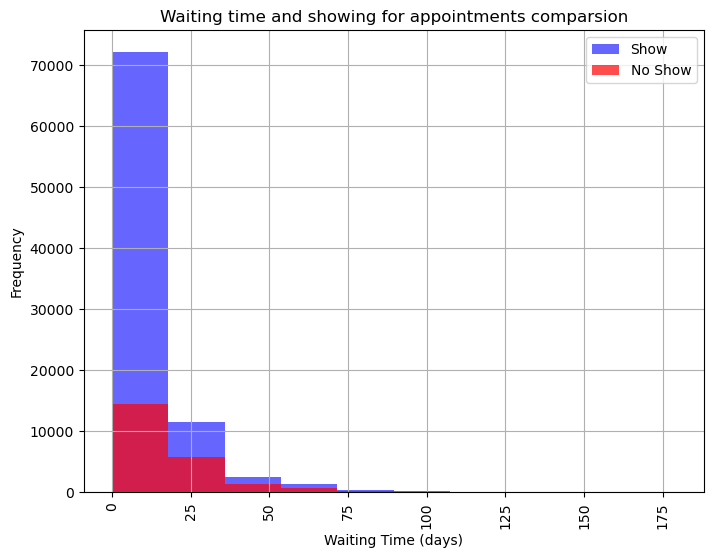

In [39]:
# Plot histogram between show vs noshow based on their ages
plt.figure(figsize = (8,6))
# patients who showed up are labeled by Yes and those who didn't by No

plt.hist(df[Show]['WaitingTime'],  color = 'blue' , alpha = 0.6,label = 'Show')
plt.hist(df[NoShow]['WaitingTime'], color = 'red', alpha = 0.7, label = 'No Show')
plt.title('Waiting time and showing for appointments comparsion')
plt.xlabel('Waiting Time (days)')
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.legend()
plt.grid(True)
plt.show()


As seen above, it seems like there's no strong correlation between waiting time and NoShow possibility of patients.

### What is the impact of ther external factors (i.e., Goegraphical location)?

In this section we'll focus more on the location of these pateints and try to identify any possible patterns or correlation between showing up, their geographical location and other variables such as SMS recieved.

First Let's visualise the data set to get a better insight.

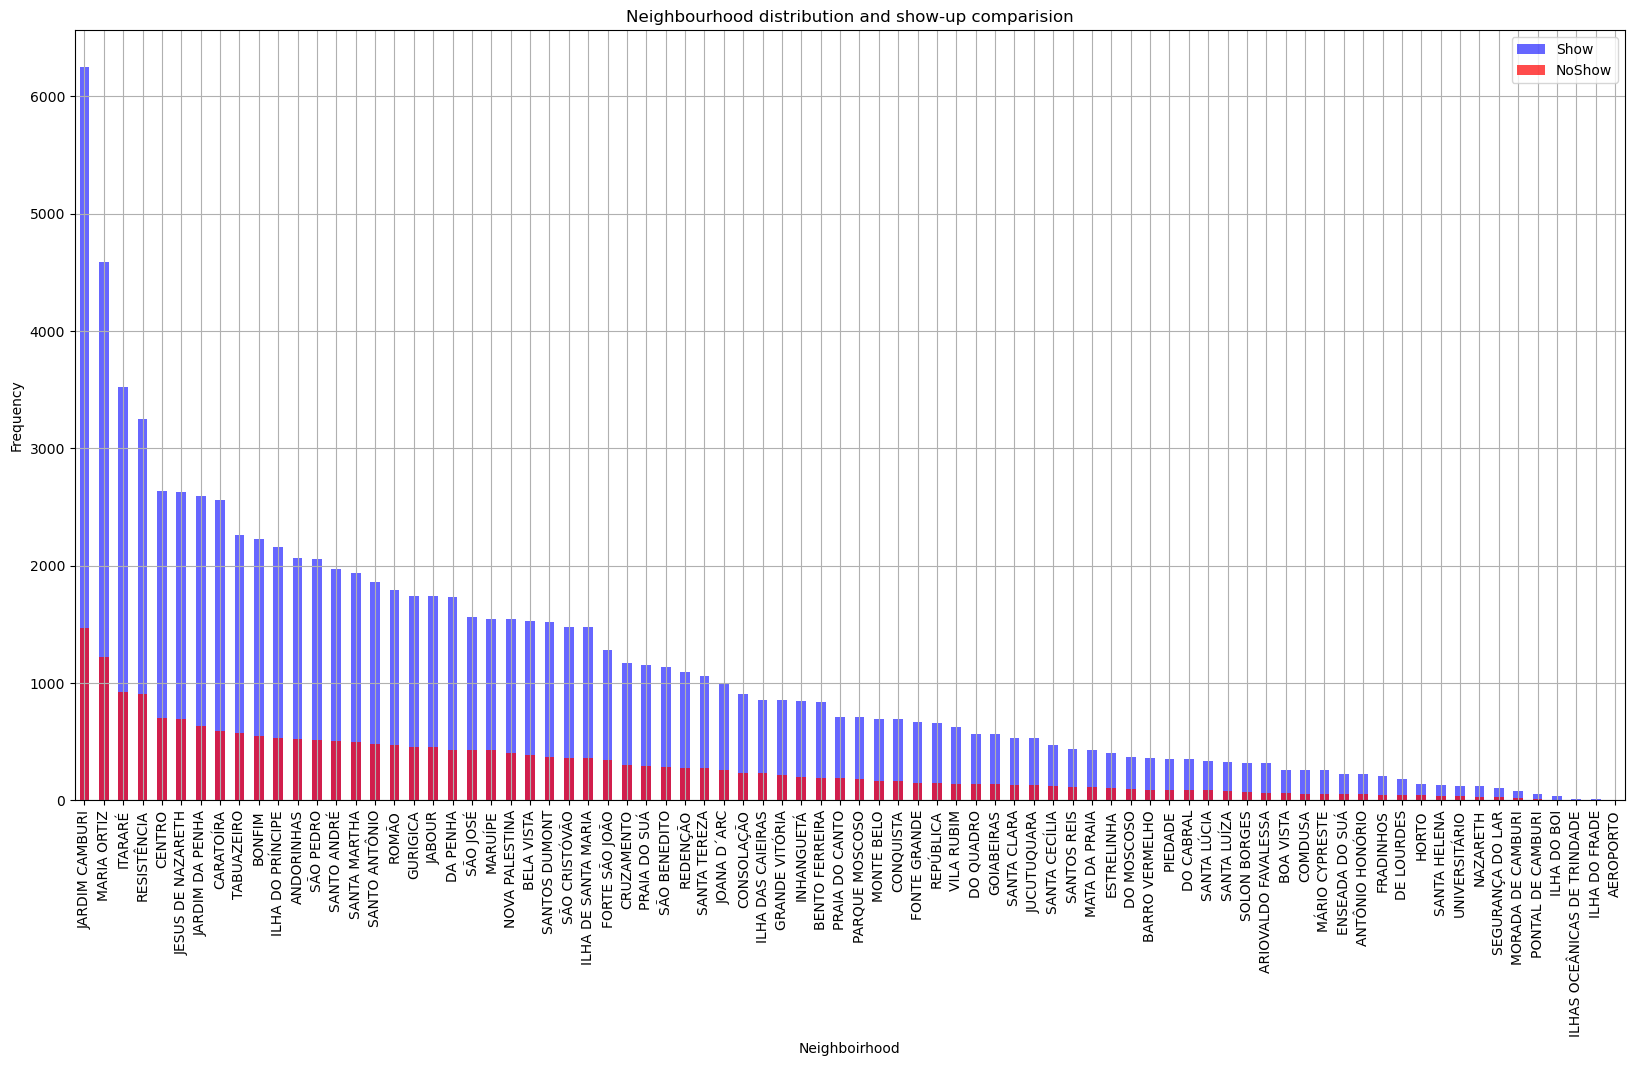

In [40]:
# Plot a bar chart to compare show up rates in each neighbourhood
plt.figure(figsize = (20,10))
df.Neighbourhood[Show].value_counts().plot( kind = 'bar',color = 'blue', alpha = 0.6 , label = 'Show' )
df.Neighbourhood[NoShow].value_counts().plot( kind = 'bar',color = 'red', alpha = 0.7 , label = 'NoShow' )
plt.title('Neighbourhood distribution and show-up comparision')
plt.xlabel('Neighboirhood')
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.legend()
plt.grid(True)
plt.show();

It seems like JARDIM CAMBURI has a higher number of No Show patients but it also the highest visits or appointments. one might re plot the chart and accounts for rates by executing the equation; No. of Show/ total No. of Visits . However, this is not a real indicator as many neighbourhood has various and small number of appointments. we can observe that the number of NoShow patients increases as the number of appointments increases as well which is quite normal.

From the chart, we can see the clinic has been serving mainly two neighbourhoods, JARDIM CAMBURI & MARIA ORTIZ.

In [41]:
# Define SMSRecieved
SMS = df['SMSReceived'] == True
NoSMS = df['SMSReceived'] == False

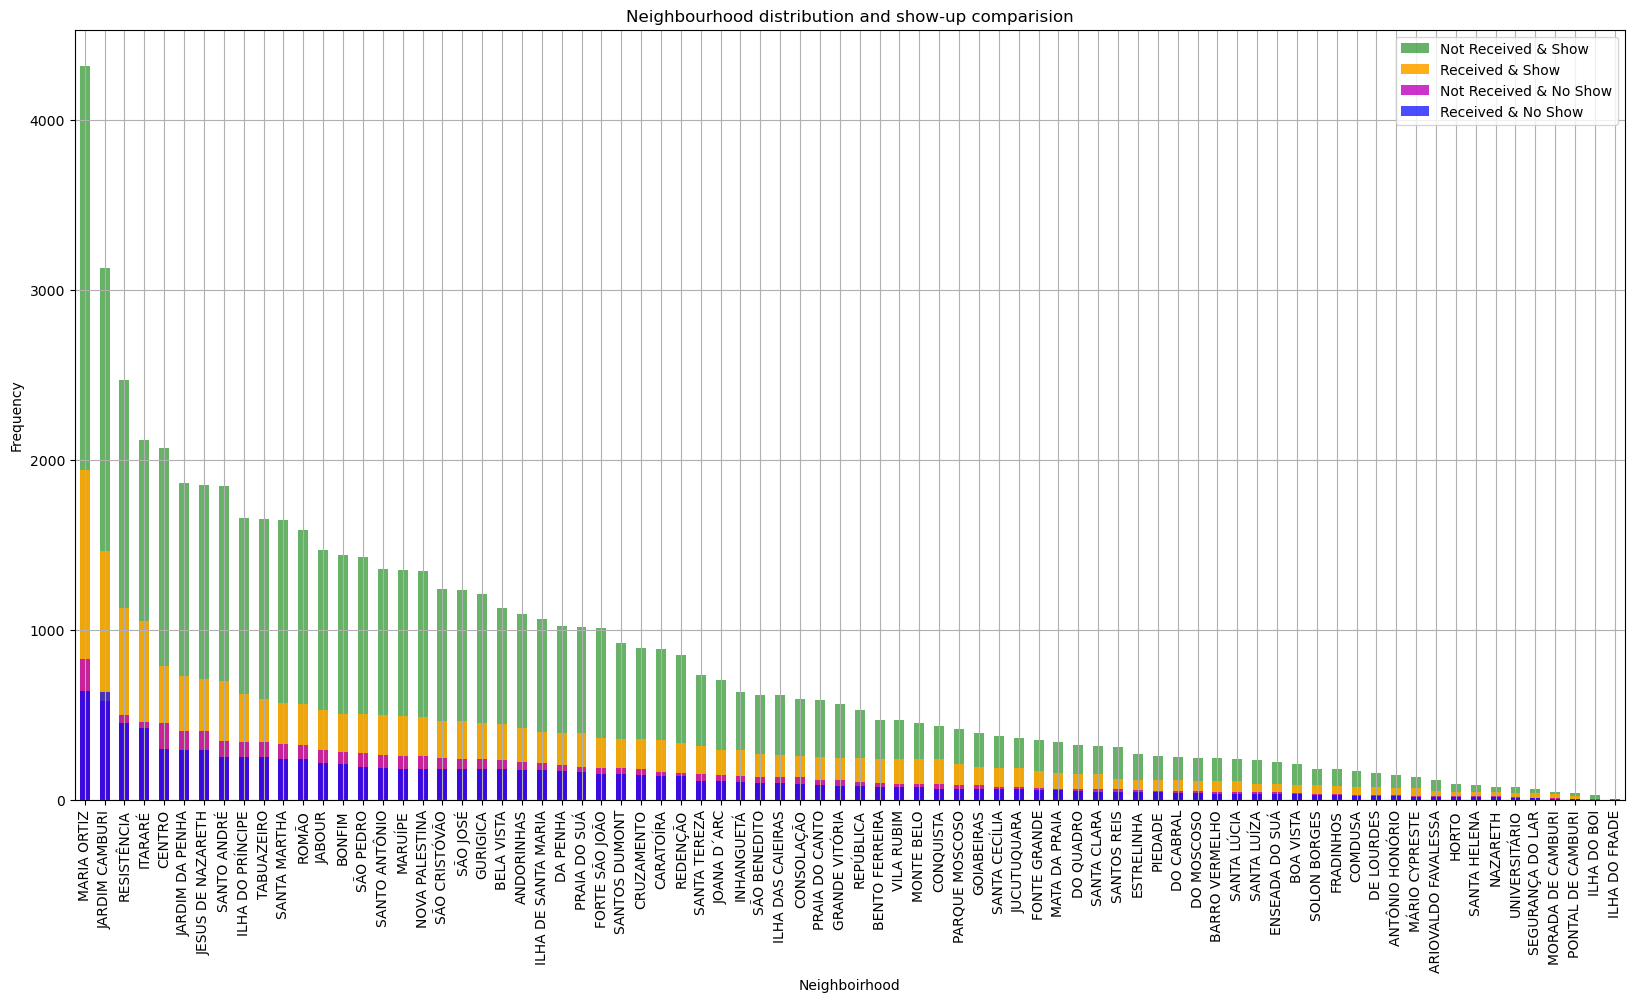

In [42]:
# Plot a bar chart to compare show up rates in each neighbourhood

plt.figure(figsize = (20,10))

df.Neighbourhood[NoSMS][Show].value_counts().plot( kind = 'bar',color = 'green' ,alpha = 0.6, label = 'Not Received & Show' )
df.Neighbourhood[SMS][Show].value_counts().plot( kind = 'bar',color = 'orange', alpha= 0.9, label = 'Received & Show' )
df.Neighbourhood[NoSMS][NoShow].value_counts().plot( kind = 'bar',color = 'm', alpha= 0.8, label = 'Not Received & No Show')
df.Neighbourhood[SMS][NoShow].value_counts().plot( kind = 'bar',color = 'blue' ,alpha = 0.7, label = 'Received & No Show' )


plt.title('Neighbourhood distribution and show-up comparision')
plt.xlabel('Neighboirhood')
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.legend()
plt.grid(True)
plt.show();

The chart shows an odd conclusion. in all neighbourhoods, it seems that peopl who did not receive an SMS has a higher rate or number of showing up to appointments. This shows that receiving an SMS does not affect the possibility of showing up to appointments in this clinc nor to any neighbourhood specifically.

One more variable we could explore is gender.

In [92]:
def get_pie(df , Xvar, labels = None):
    """
    Generate a Pie chart based on a filtered dataframe for both cases; Show or NoShow
    
    args:
    df: dataframe
    Xvar: name of the columns in the dataframe
    labels: list of uniqe lables for the data frame
    
    """
    if labels == None:
        labels = df[Xvar][Show].value_counts().index.tolist()
   # Plot
    plt.figure(figsize=(8, 6))
   # Generate pie chart for Show status
    plt.subplot(1, 2, 1)
    df[Xvar][Show].value_counts().plot(kind='pie', autopct='%.1f%%', labels=labels, explode=[0, 0.1], fontsize=12)
    plt.title("Show")
    plt.axis('equal')

    # Generate pie chart for 'NoShow' status
    plt.subplot(1, 2, 2)
    df[Xvar][NoShow].value_counts().plot(kind='pie', autopct='%.1f%%', labels=labels, explode=[0, 0.1], fontsize=12)
    plt.title("NoShow")
    plt.axis('equal')
    

    plt.suptitle(f'Percentage of {Xvar} for both status')
    plt.tight_layout()
    plt.show()

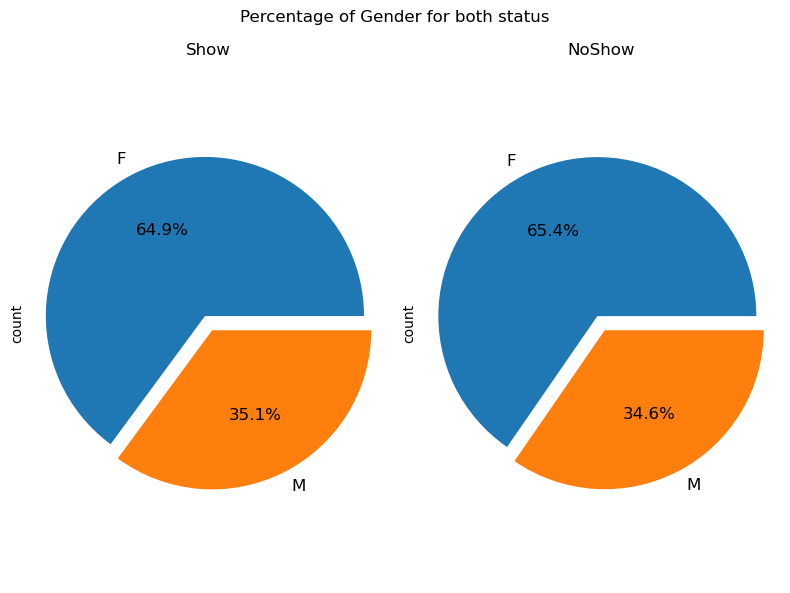

In [93]:
get_pie(df, 'Gender')

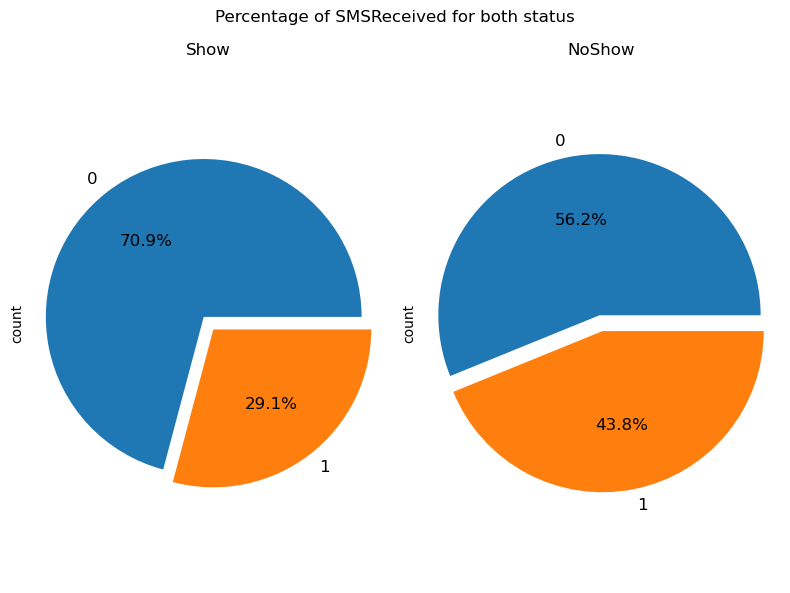

In [94]:
get_pie(df, 'SMSReceived')

<a id='conclusions'></a>
## Conclusions

> This simple report conclude that the only possible affect on patients not showing up might age and neighbourhood. we could see that between 0 and and high fifties the number of patients not showing up is high.
> Neighbourhood has also an impact. this can be seen as the clinic has high number of appointments for JARDIM CAMBURI and hence high number of abscence from this negibourhood.
> Most patients were female, young, didn't have scholarship neither any chronic diseases.

>**Limitations**:
> A number of questions and queries has been raised when analysing this dataset. it seems like a high number of patients are aged 0. what is the reason behind this number? 
> The waiting time was for most of the appointments zero, this means most the appointments was booked on the same day, this does not show any affective distribution for the data.
> The dataset was only for a short period of time (almost 40 days), a higher period will have a better conculsion.
>Missing data that could be added such as; Employment, and presence of companion will help achieve better results.